In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [2]:
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.geocoders import Nominatim
from time import sleep
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [4]:
data=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/Eco_Strava_data.csv')
data['Strava_MADT']=data['stv_total']/data['days_in_month']
data.head()

Unnamed: 0    ID location  latitude  longitude  year  month   MTT  \
0           0  3575    urban     32.66    -117.07  2018      3  4984   
1           1  3575    urban     32.66    -117.07  2018      4  8473   
2           2  3575    urban     32.66    -117.07  2018      5  5853   
3           3  3575    urban     32.66    -117.07  2018      6  6068   
4           4  3575    urban     32.66    -117.07  2018      7  7991   

   days_in_month  Simple_MADT  ...      osmId  dist   edge_uid osm_refere  \
0             31       160.77  ...  234828855   d11  305836426  234828855   
1             30       282.43  ...  234828855   d11  305836426  234828855   
2             31       188.81  ...  234828855   d11  305836426  234828855   
3             30       202.27  ...  234828855   d11  305836426  234828855   
4             31       257.77  ...  234828855   d11  305836426  234828855   

  stv_total stv_com_total stv_rec_total stv_com_ratio  stv_rec_ratio  \
0      2115           120          1995          0.06           0.94   
1      2245           155          2090          0.07           0.93   
2      2530           175          2355          0.07           0.93   
3      2335           145          2190          0.06           0.94   
4      2550           135          2415          0.05           0.95   

  Strava_MADT  
0       68.23  
1       74.83  
2       81.61  
3       77.83  
4       82.26  

[5 rows x 45 columns]

In [5]:
data['City Bicycle Facilities'].unique()

array(['Path', 'Bike Lane', 'Bike Route', 'Trail', 'Unknown',
       'Cycle Track', 'Other'], dtype=object)

<AxesSubplot:xlabel='AASHTO_MADT', ylabel='Strava_MADT'>

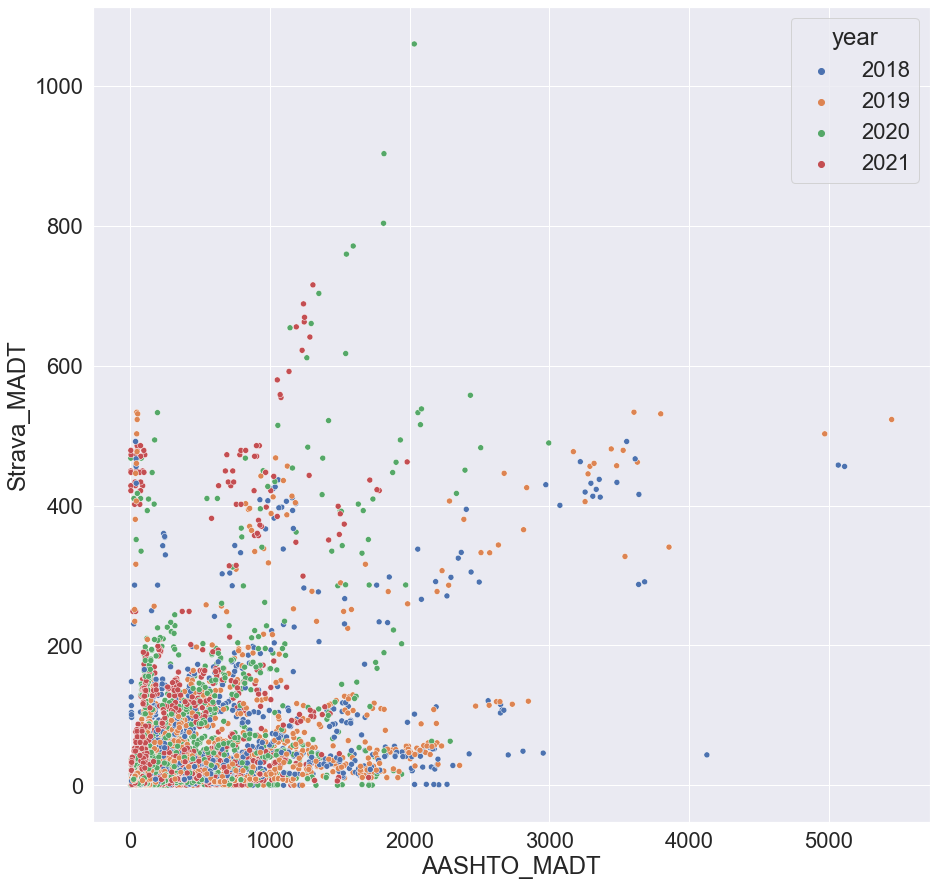

In [16]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=2.0)
sns.scatterplot(data=data, x="AASHTO_MADT", y="Strava_MADT", hue="year", palette="deep")

<AxesSubplot:xlabel='Simple_MADT', ylabel='Strava_MADT'>

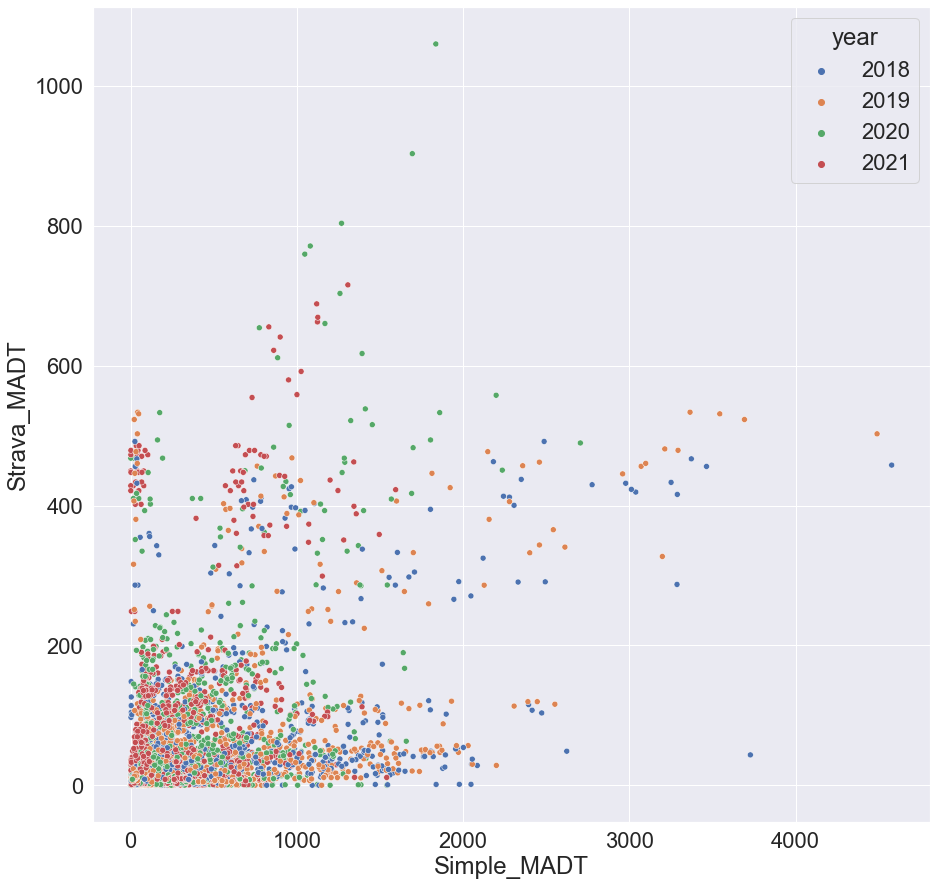

In [7]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=2.0)
sns.scatterplot(data=data, x="Simple_MADT", y="Strava_MADT", hue="year", palette="deep")

# lets separate the Pattern by Bike facilities

In [8]:
data['City Bicycle Facilities'].unique()

array(['Path', 'Bike Lane', 'Bike Route', 'Trail', 'Unknown',
       'Cycle Track', 'Other'], dtype=object)

In [9]:
path=data.loc[data['City Bicycle Facilities']=='Path']

In [26]:
def path_cor(MOY_ind):
    d18=MOY_ind.loc[MOY_ind['year']==2018]
    d19=MOY_ind.loc[MOY_ind['year']==2019]
    d20=MOY_ind.loc[MOY_ind['year']==2020]
    d21=MOY_ind.loc[MOY_ind['year']==2021]
    import seaborn as sns

    sns.set(rc={'figure.figsize':(25,30)})
    sns.set(font_scale=2.0)
    import seaborn as sns


    fig, ax = plt.subplots(2,2)

    ax1 = sns.scatterplot(x=d18['AASHTO_MADT'],y=d18['Strava_MADT'],hue=d18['ID'],
                       markers=True,marker="o",s=40, ax=ax[0,0]) 
    plt.xticks(rotation = 'vertical')
    ax2 = sns.scatterplot(x=d19['AASHTO_MADT'],y=d19['Strava_MADT'],hue=d19['ID'],
                       markers=True,marker="o",s=40,ax=ax[0,1]) 
    plt.xticks(rotation = 'vertical')
    ax3 = sns.scatterplot(x=d20['AASHTO_MADT'],y=d20['Strava_MADT'],hue=d20['ID'],
                       markers=True,marker="o",s=40,ax=ax[1,0])
    plt.xticks(rotation = 'vertical')
    ax4 = sns.scatterplot(x=d21['AASHTO_MADT'],y=d21['Strava_MADT'],hue=d21['ID'],
                       markers=True, marker="o",s=40,ax=ax[1,1]) 
#    ax1.set(ylim=(0, 1000))
#    ax2.set(ylim=(0, 1000))
#    ax3.set(ylim=(0, 1000))
#    ax4.set(ylim=(0, 1000))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax1.title.set_text('2018 AASHTO_MADT Vs Strava_MADT')
    ax2.title.set_text('2019 AASHTO_MADT Vs Strava_MADT')
    ax3.title.set_text('2020 AASHTO_MADT Vs Strava_MADT')
    ax4.title.set_text('2021 AASHTO_MADT Vs Strava_MADT')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    ax1.set_ylabel('Strava_MADT' )
    ax1.set_xlabel('AASHTO_MADT')
    ax2.set_ylabel('Strava_MADT' )
    ax2.set_xlabel('AASHTO_MADT')
    ax3.set_ylabel('Strava_MADT' )
    ax3.set_xlabel('AASHTO_MADT')
    ax4.set_ylabel('Strava_MADT' )
    ax4.set_xlabel('AASHTO_MADT')
    plt.show()

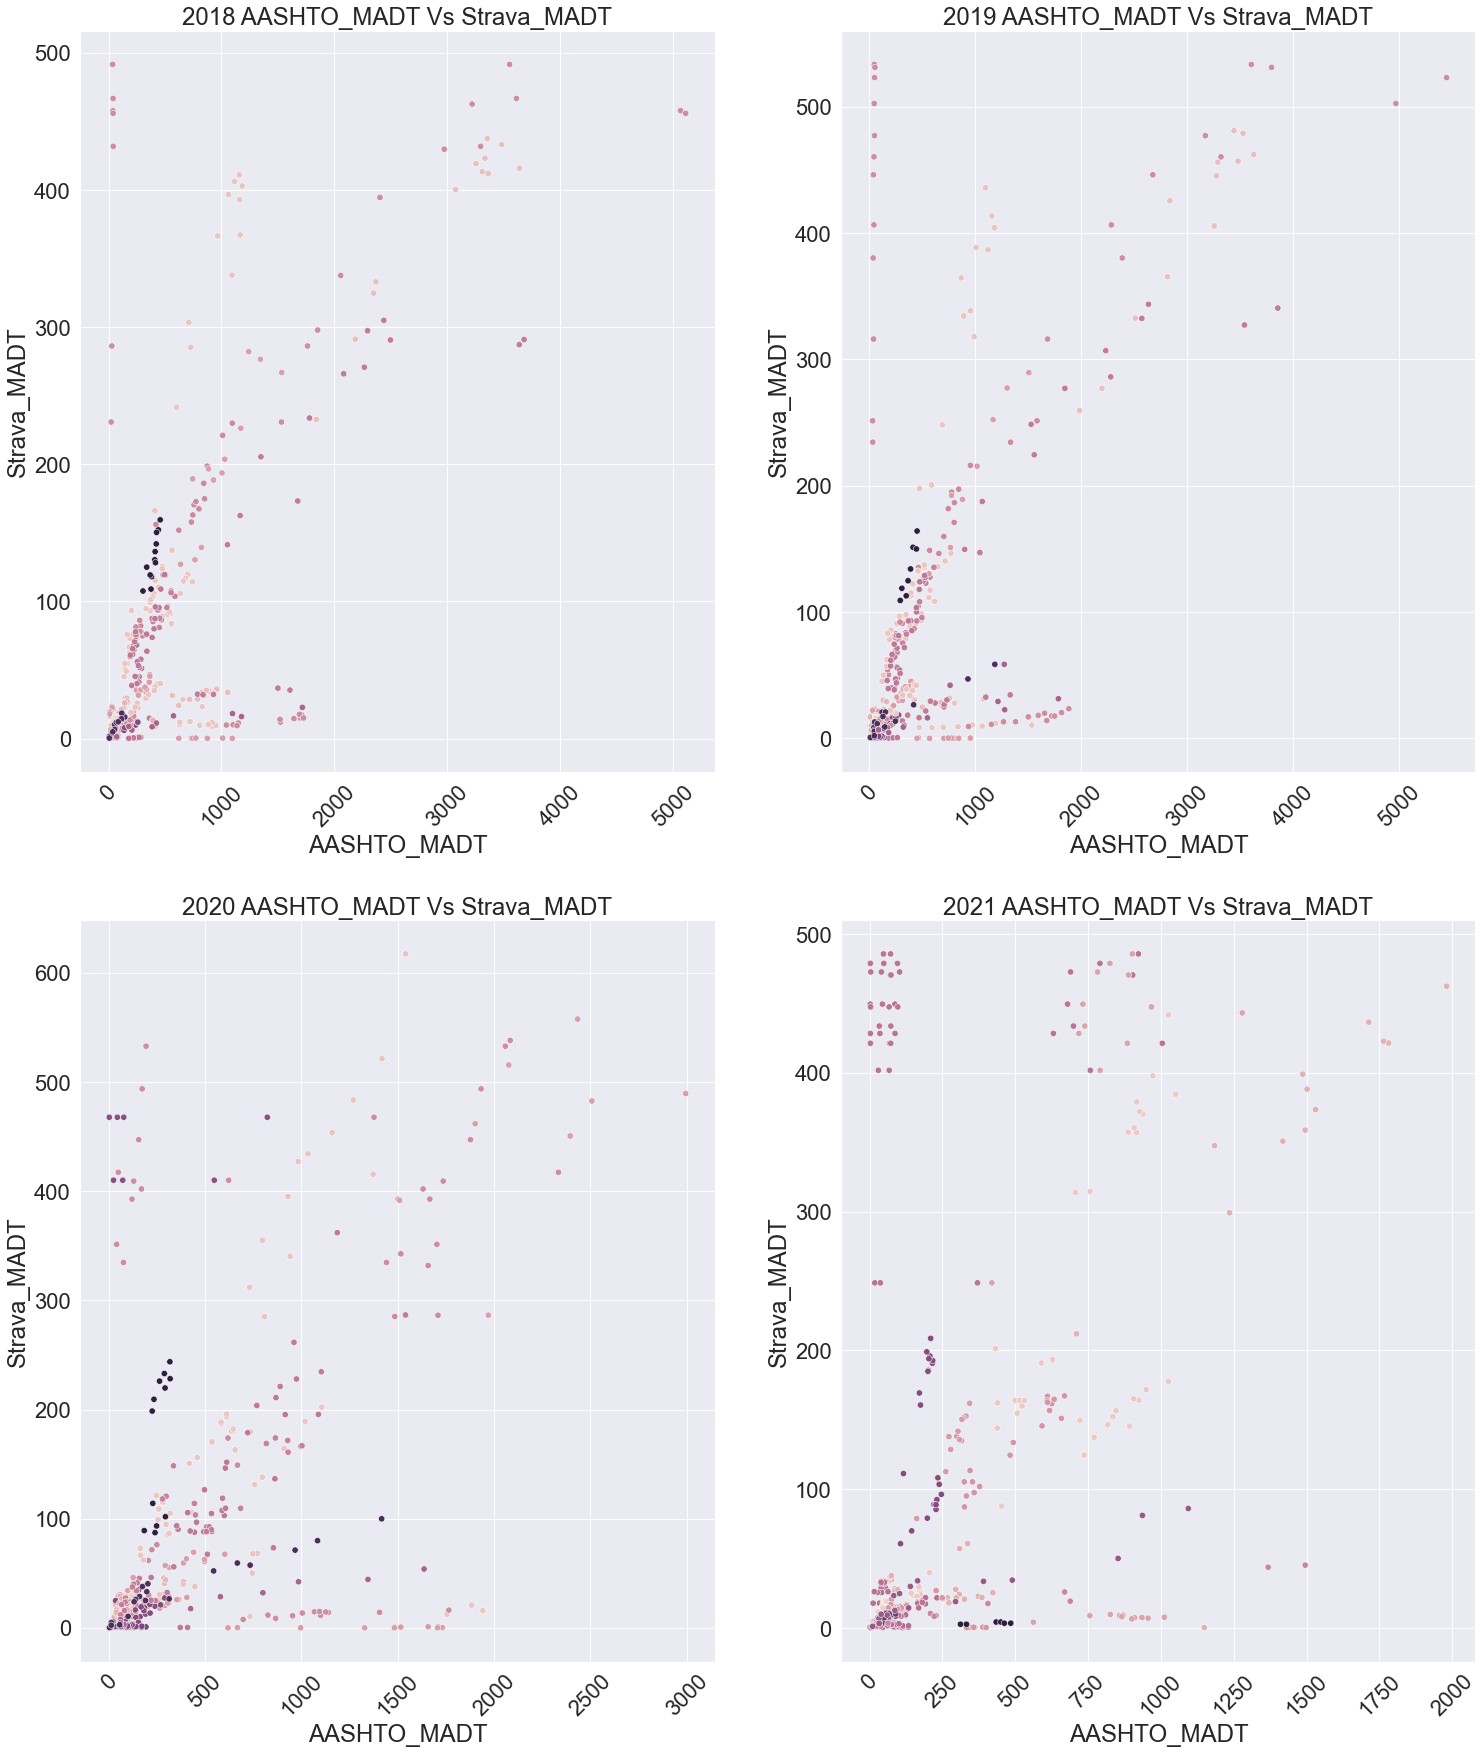

In [27]:
path_cor(path)

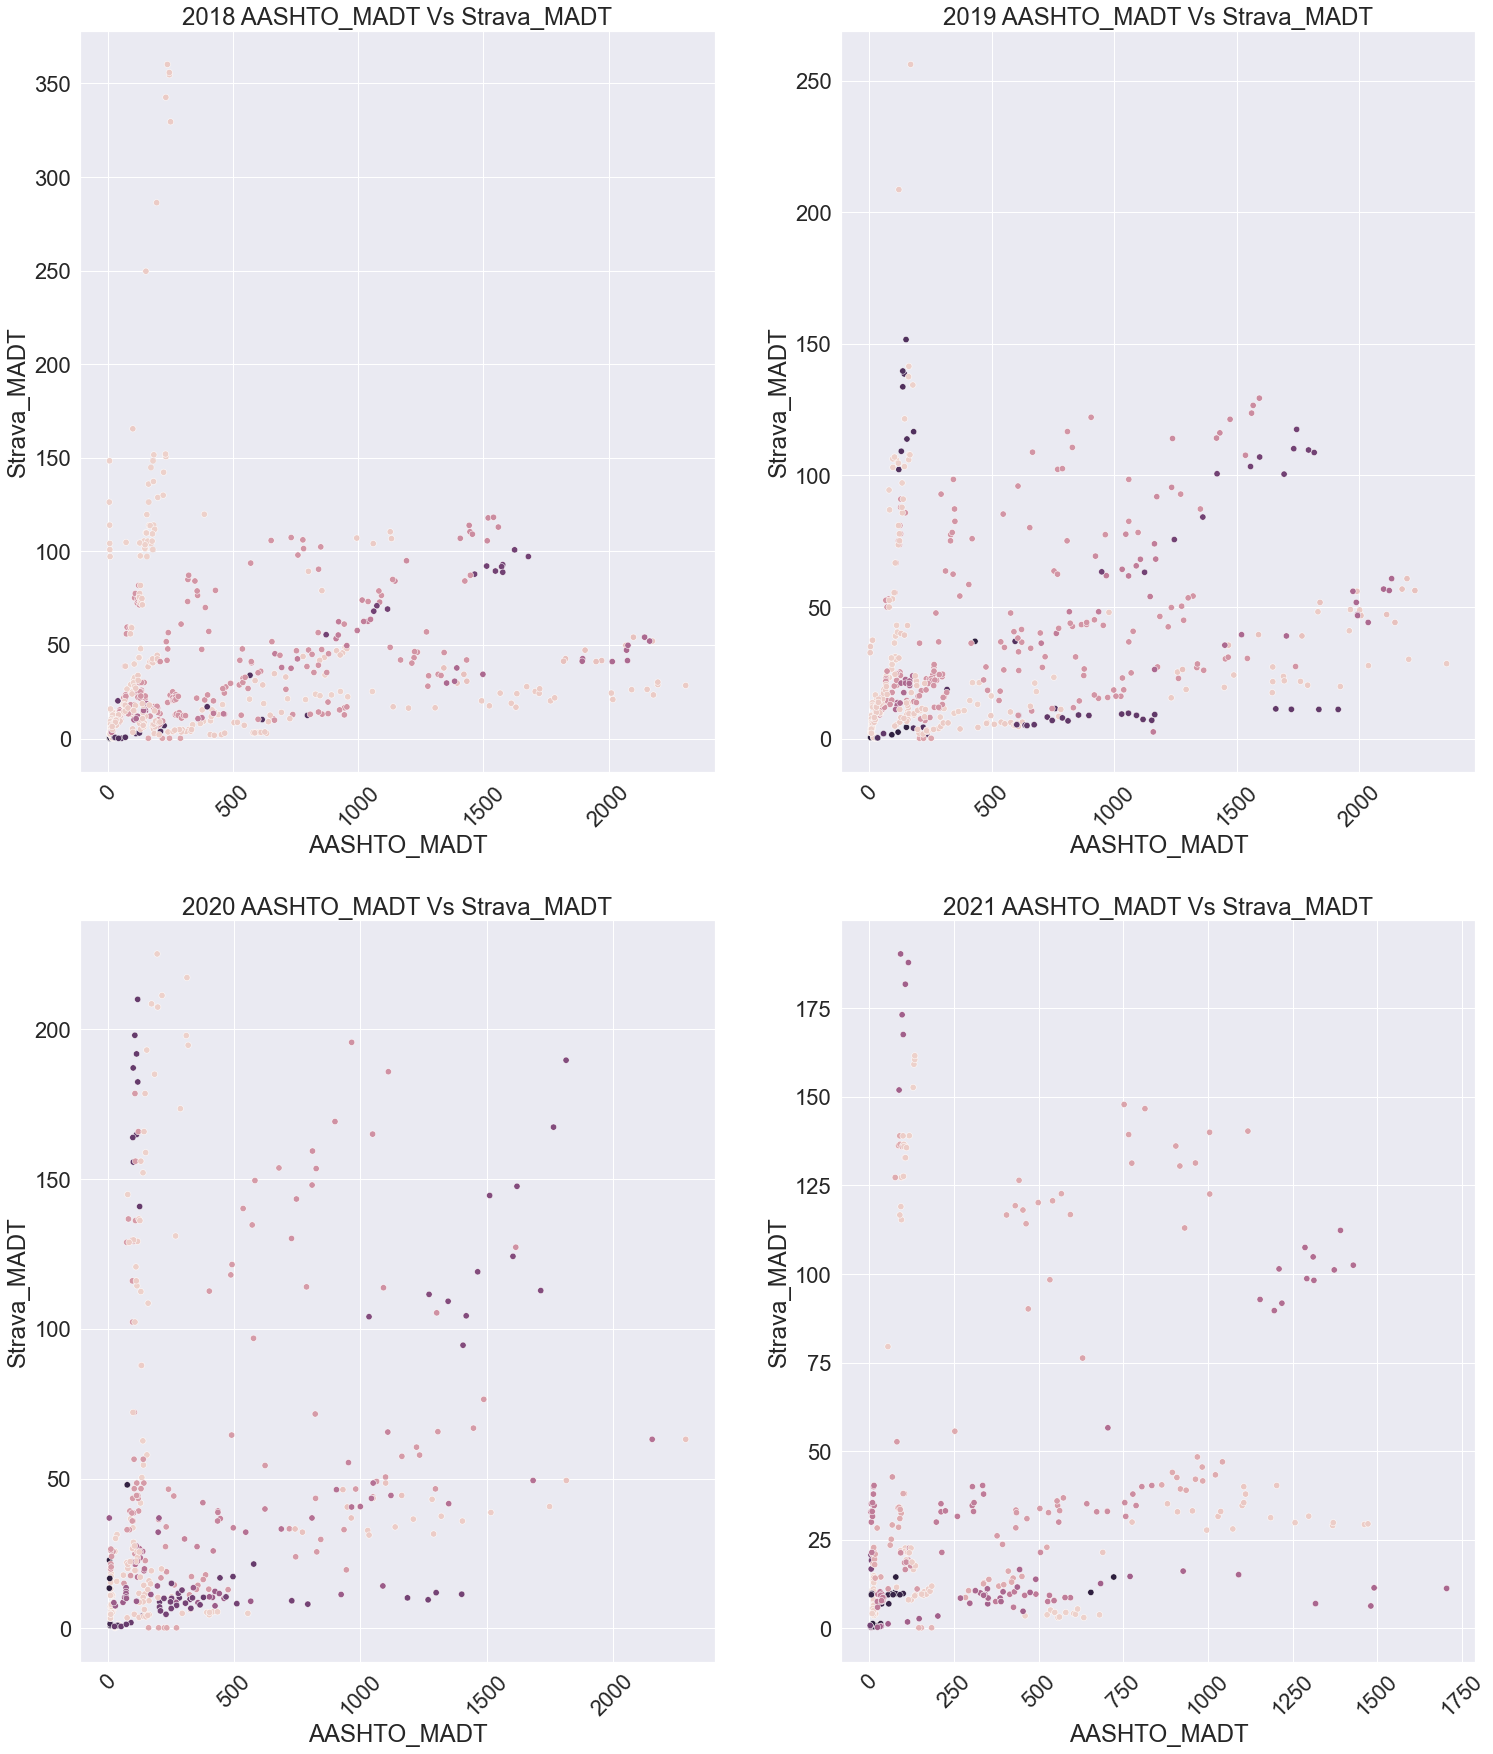

In [28]:
bl=data.loc[data['City Bicycle Facilities']=='Bike Lane']
path_cor(bl)

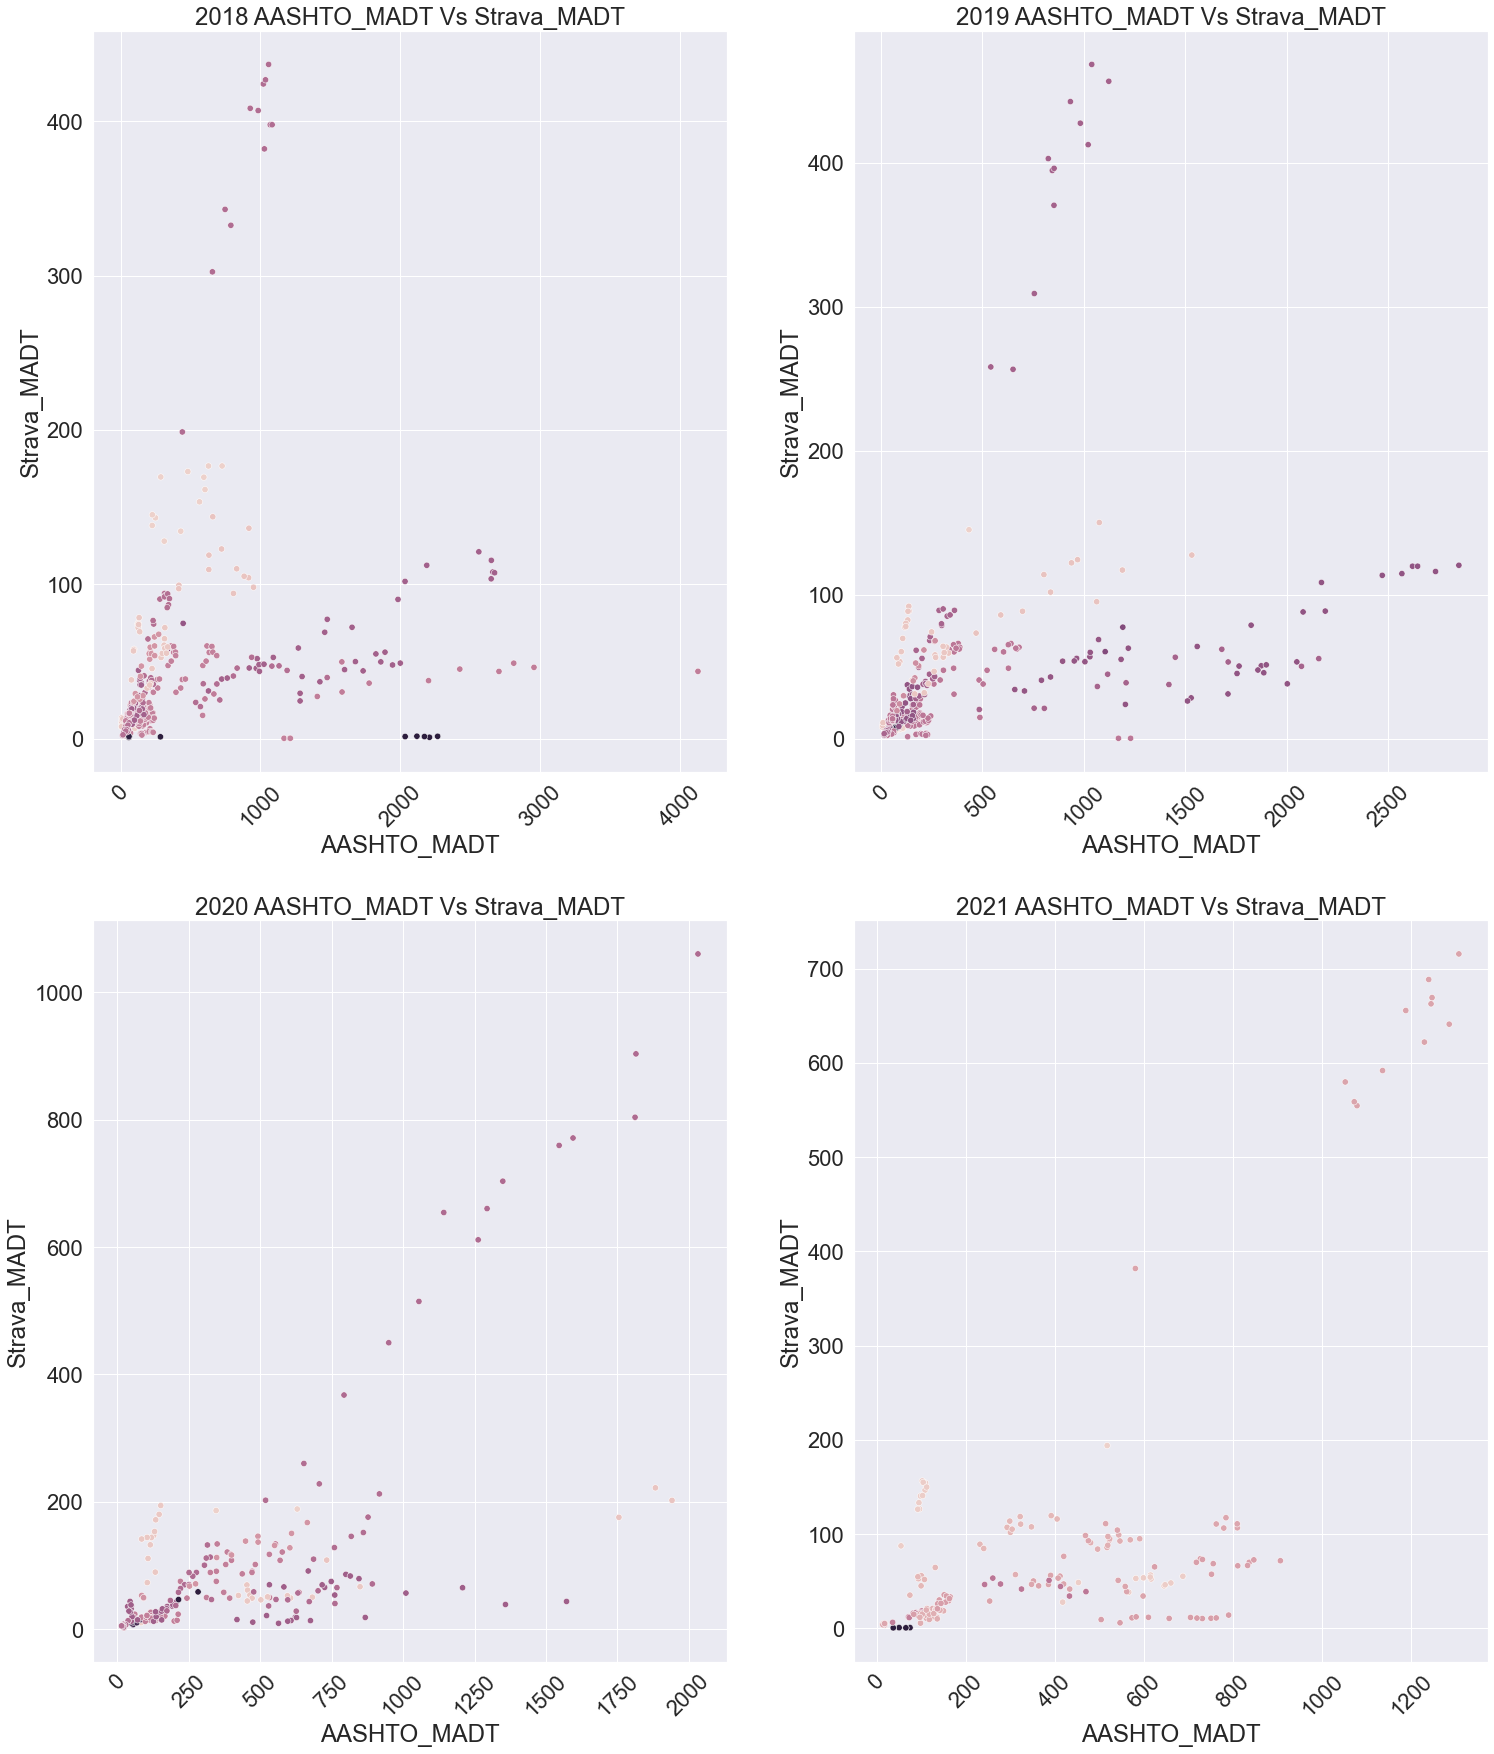

In [29]:
br=data.loc[data['City Bicycle Facilities']=='Bike Route']
path_cor(br)

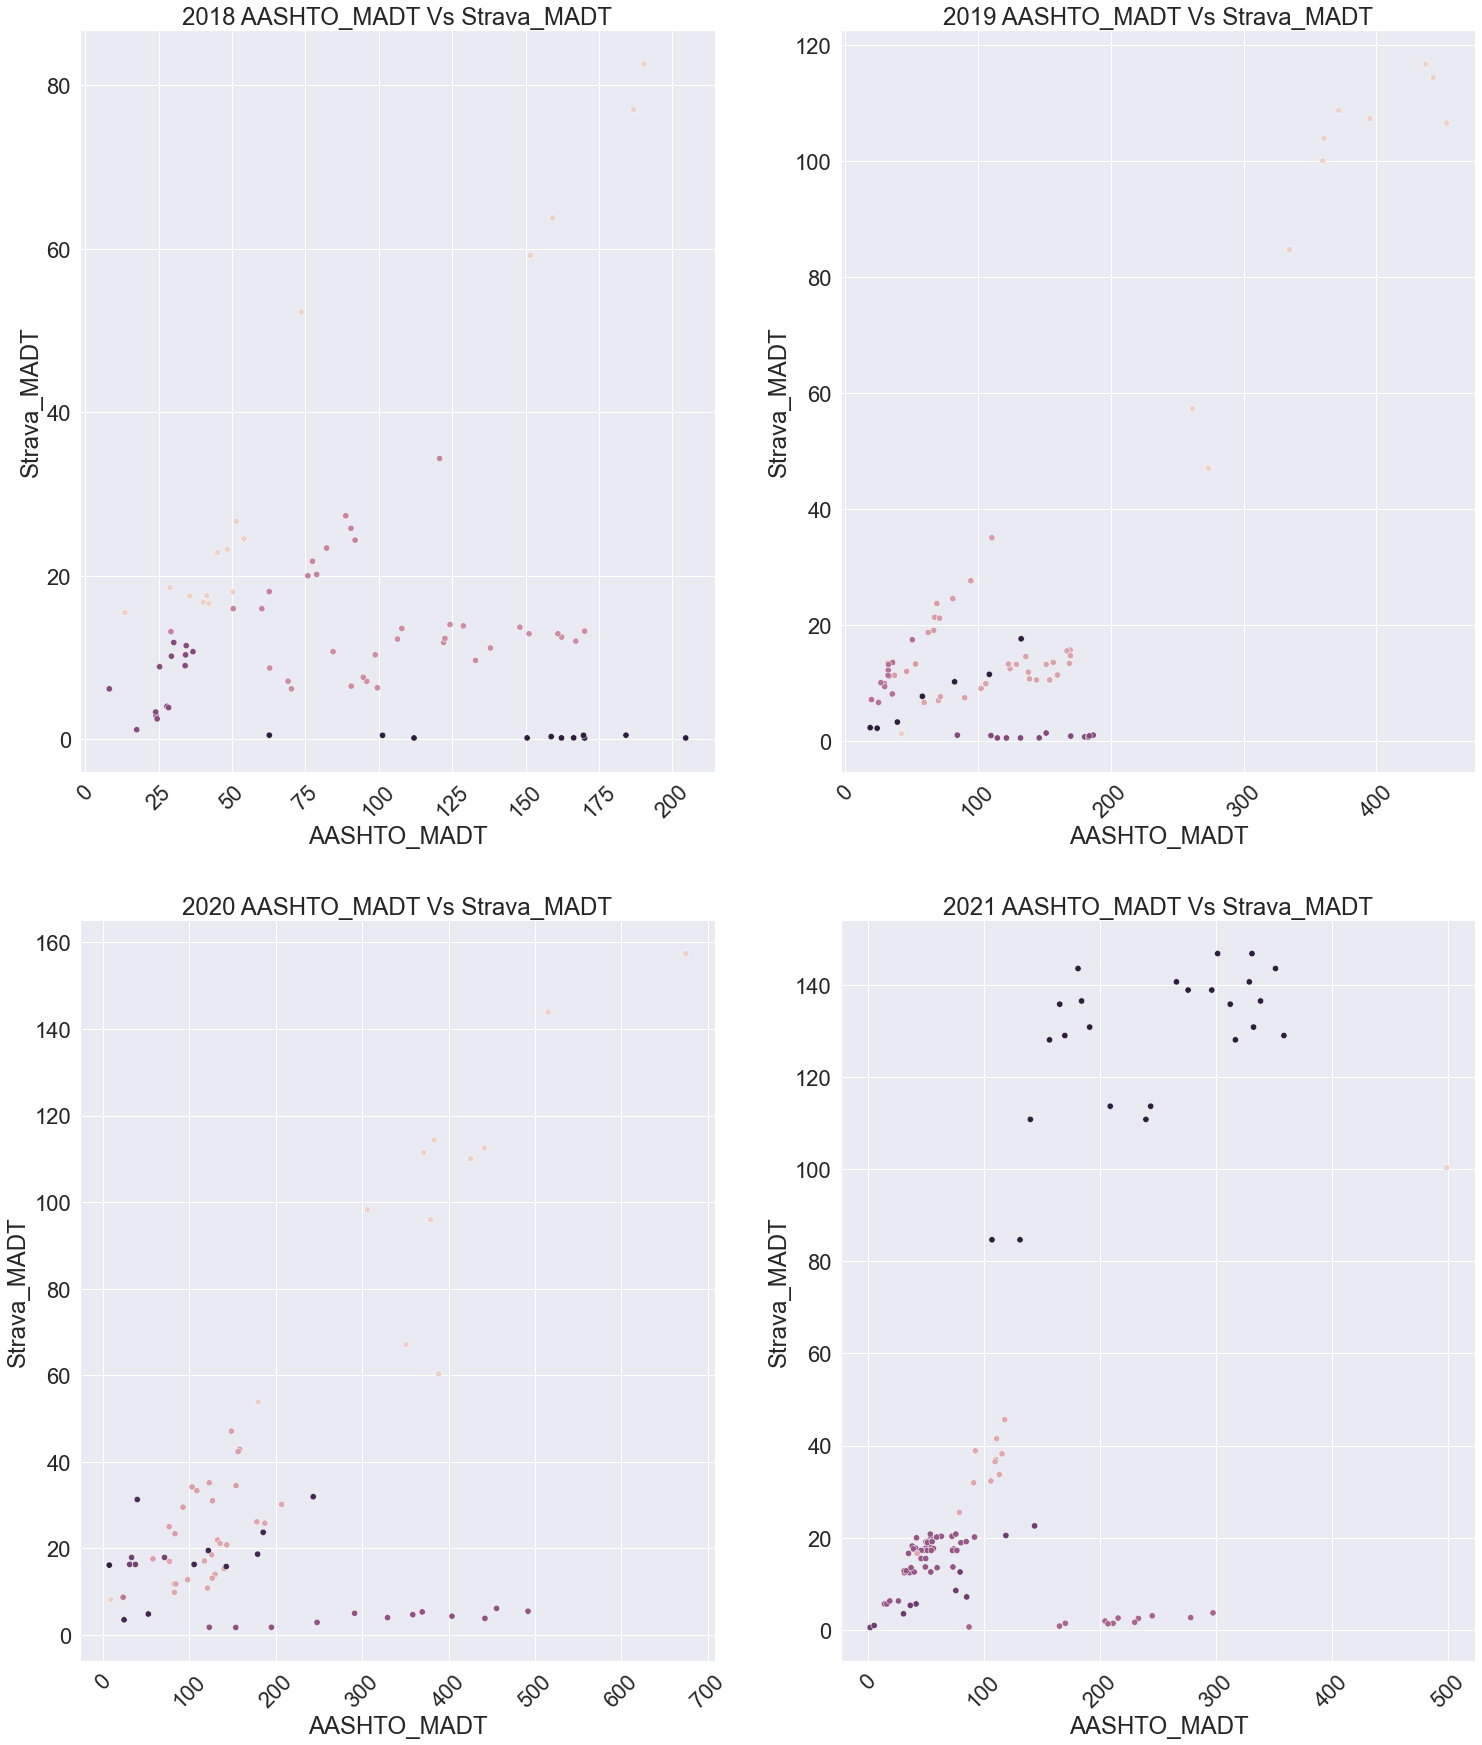

In [30]:
tl=data.loc[data['City Bicycle Facilities']=='Trail']
path_cor(tl)

AttributeError: 'NoneType' object has no attribute 'remove'

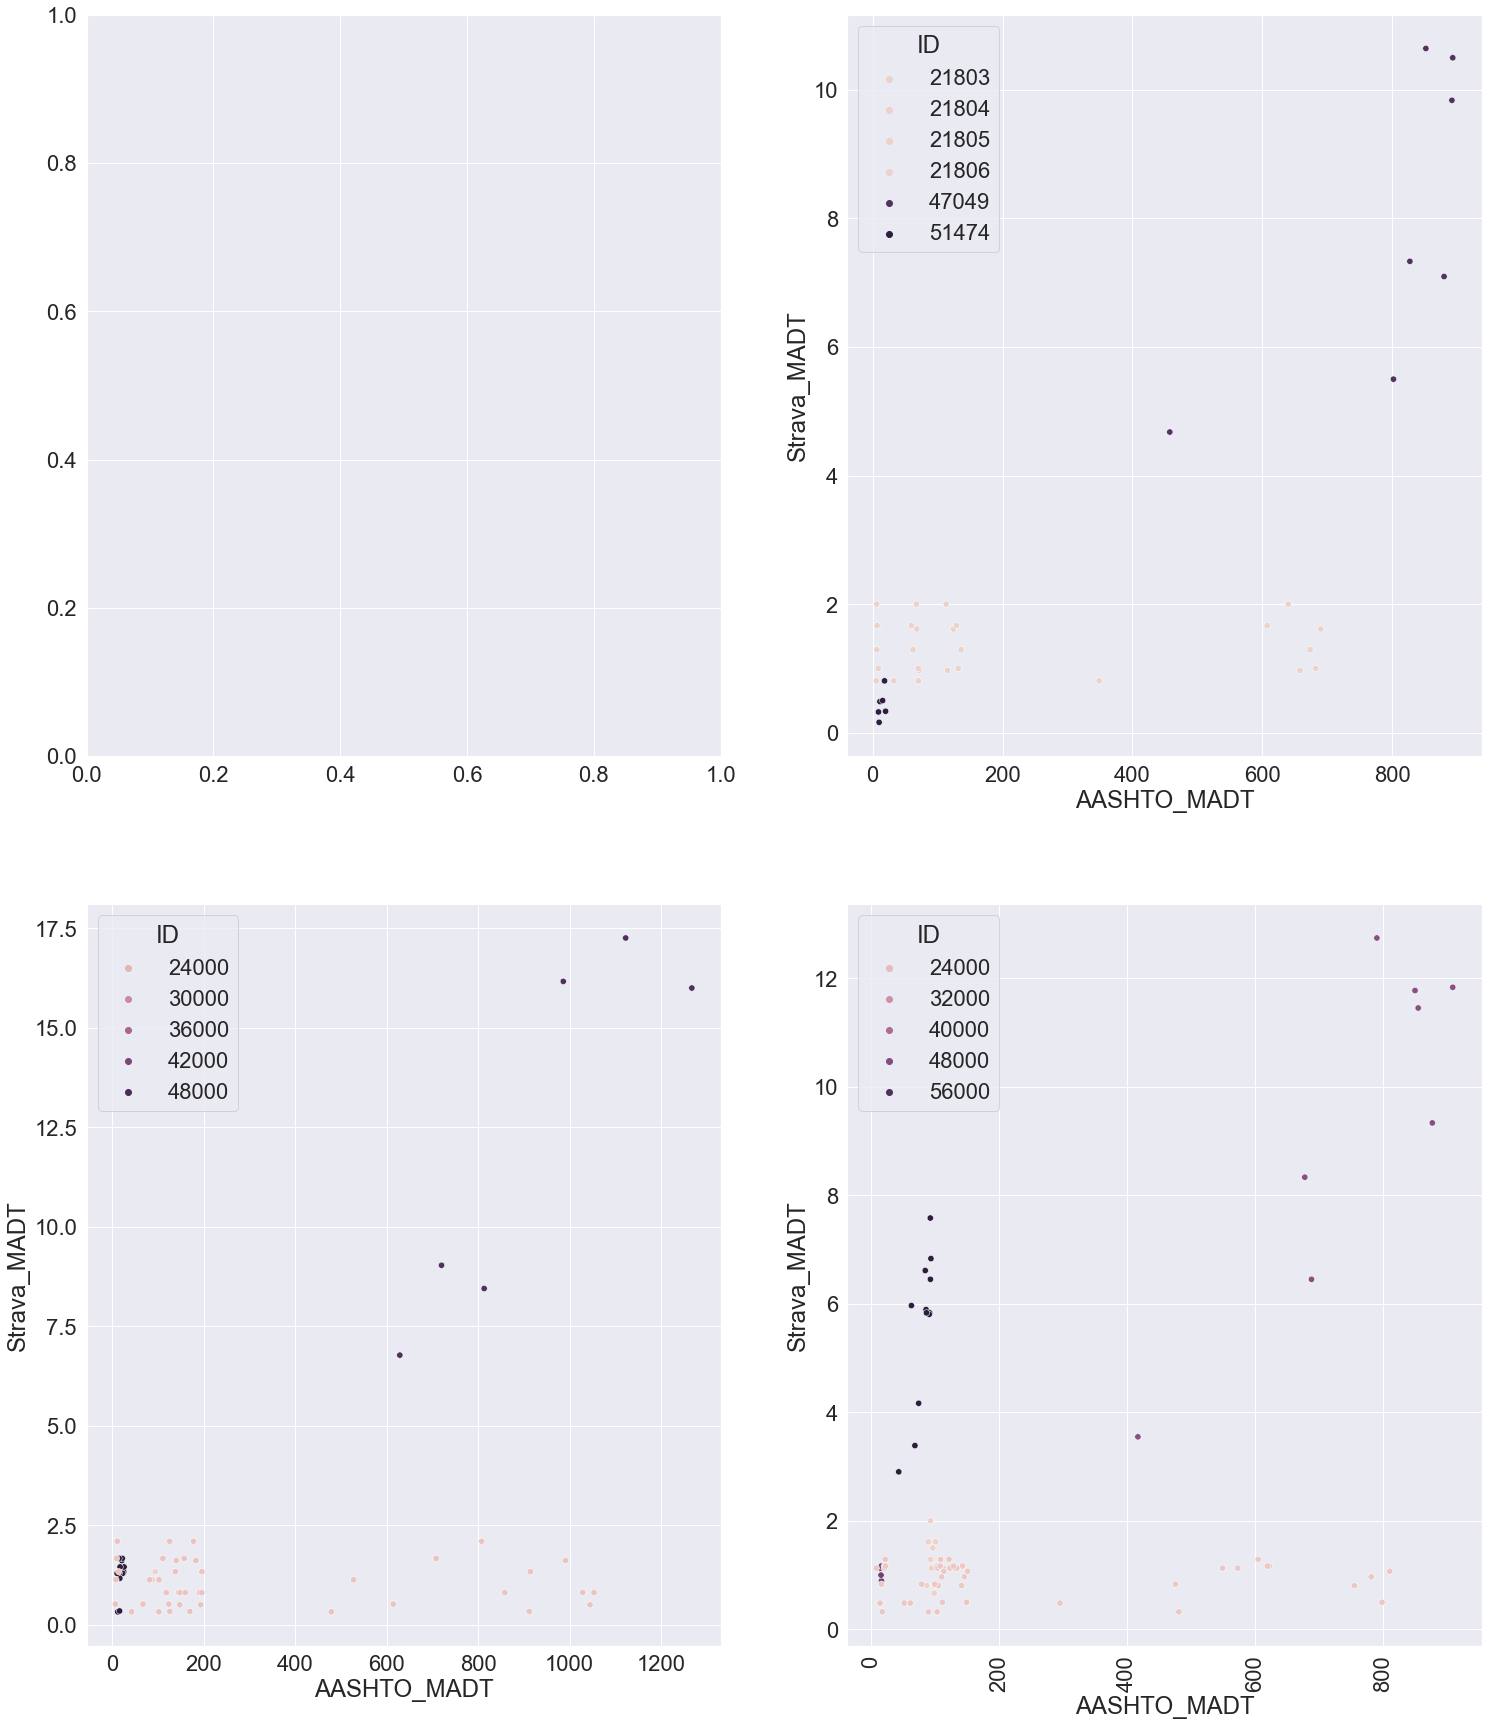

In [31]:
ct=data.loc[data['City Bicycle Facilities']=='Cycle Track']
path_cor(ct)

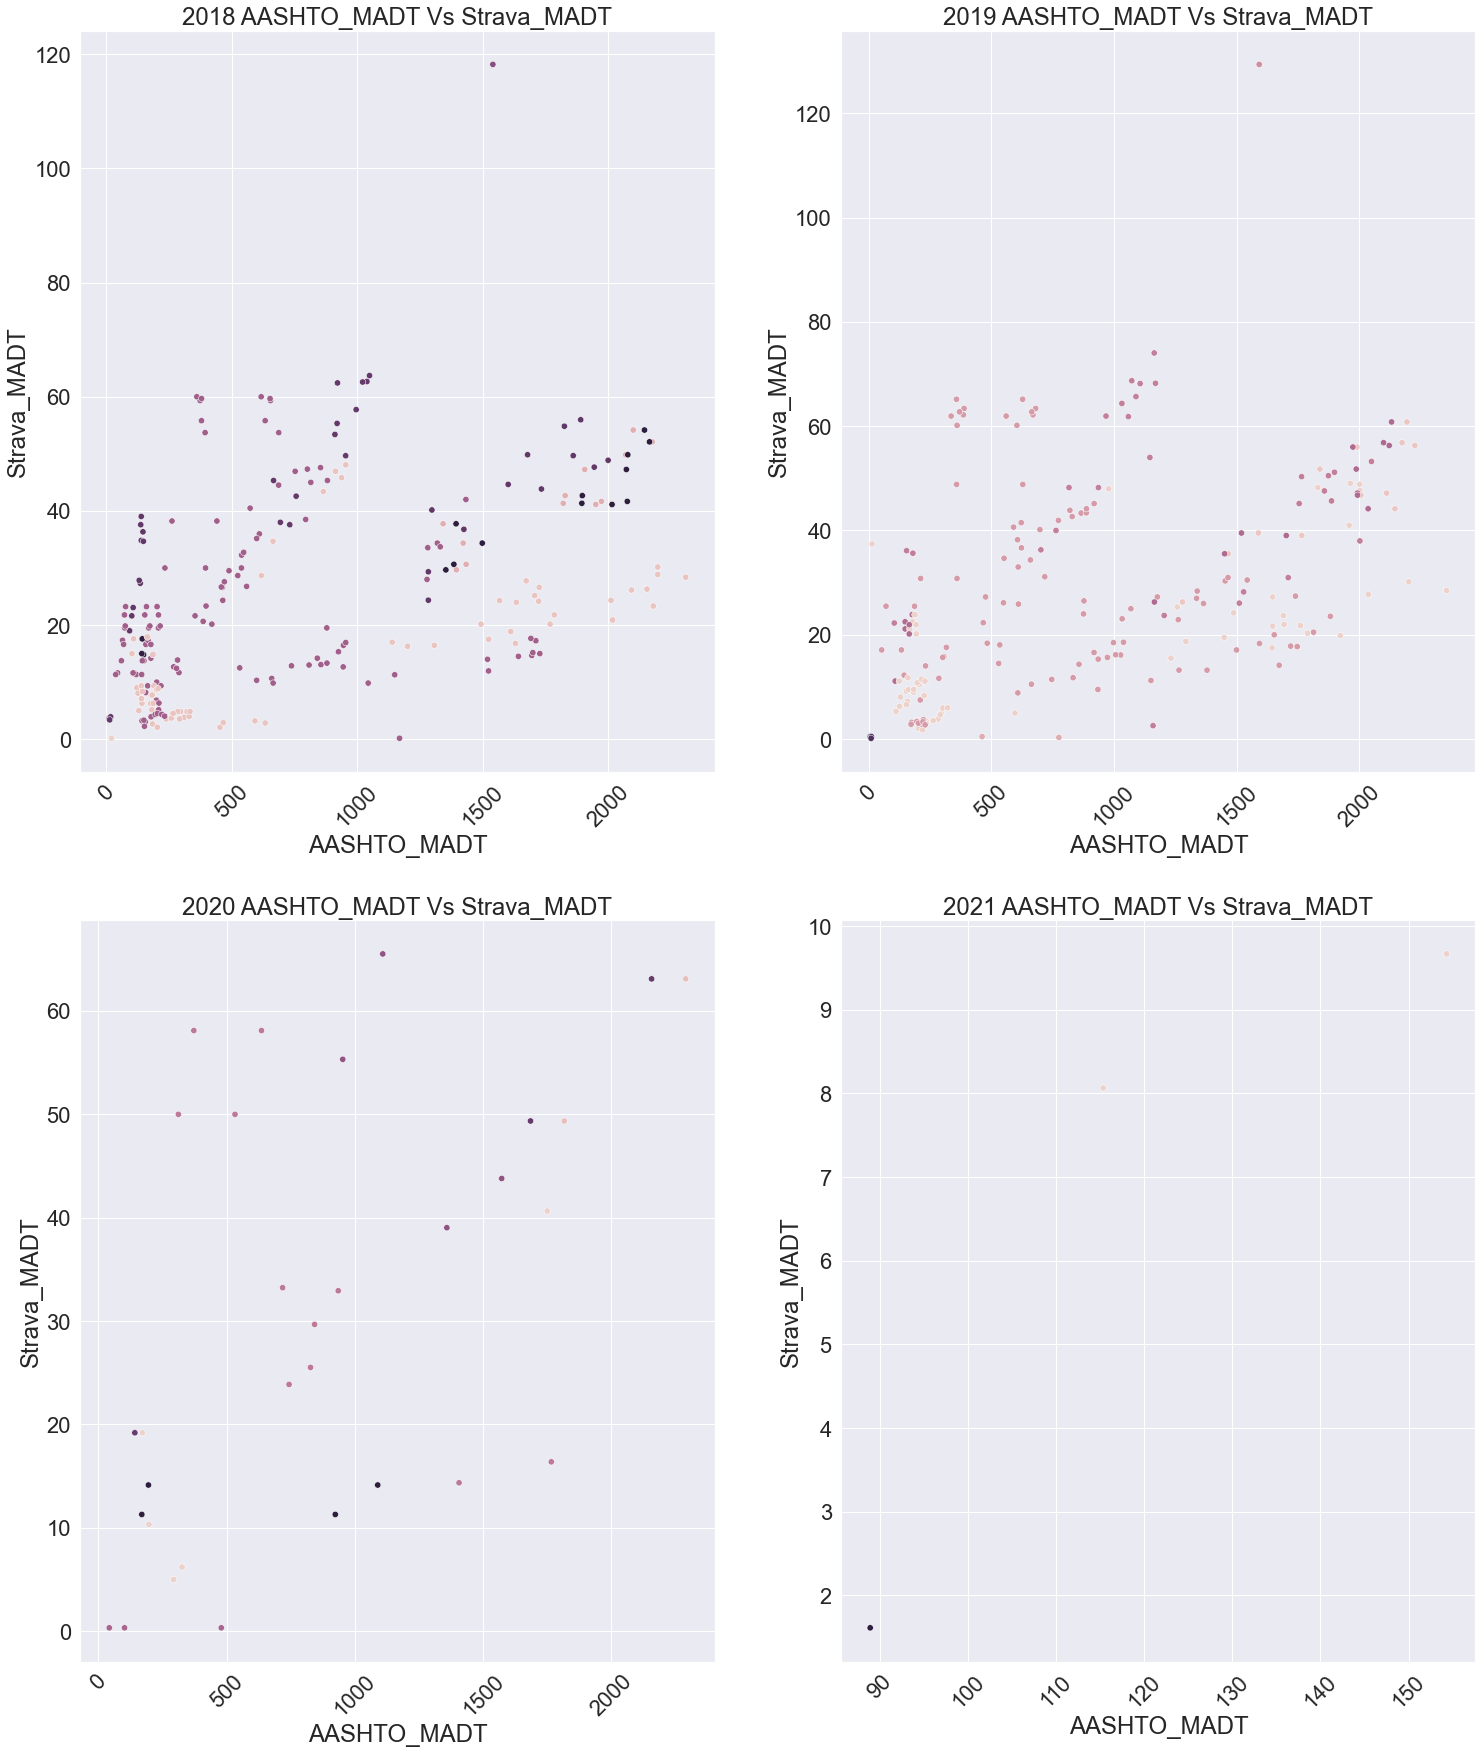

In [42]:
# Dive Commute Vs Recreation
com=data.loc[data['stv_com_ratio']>=0.60]
path_cor(com)

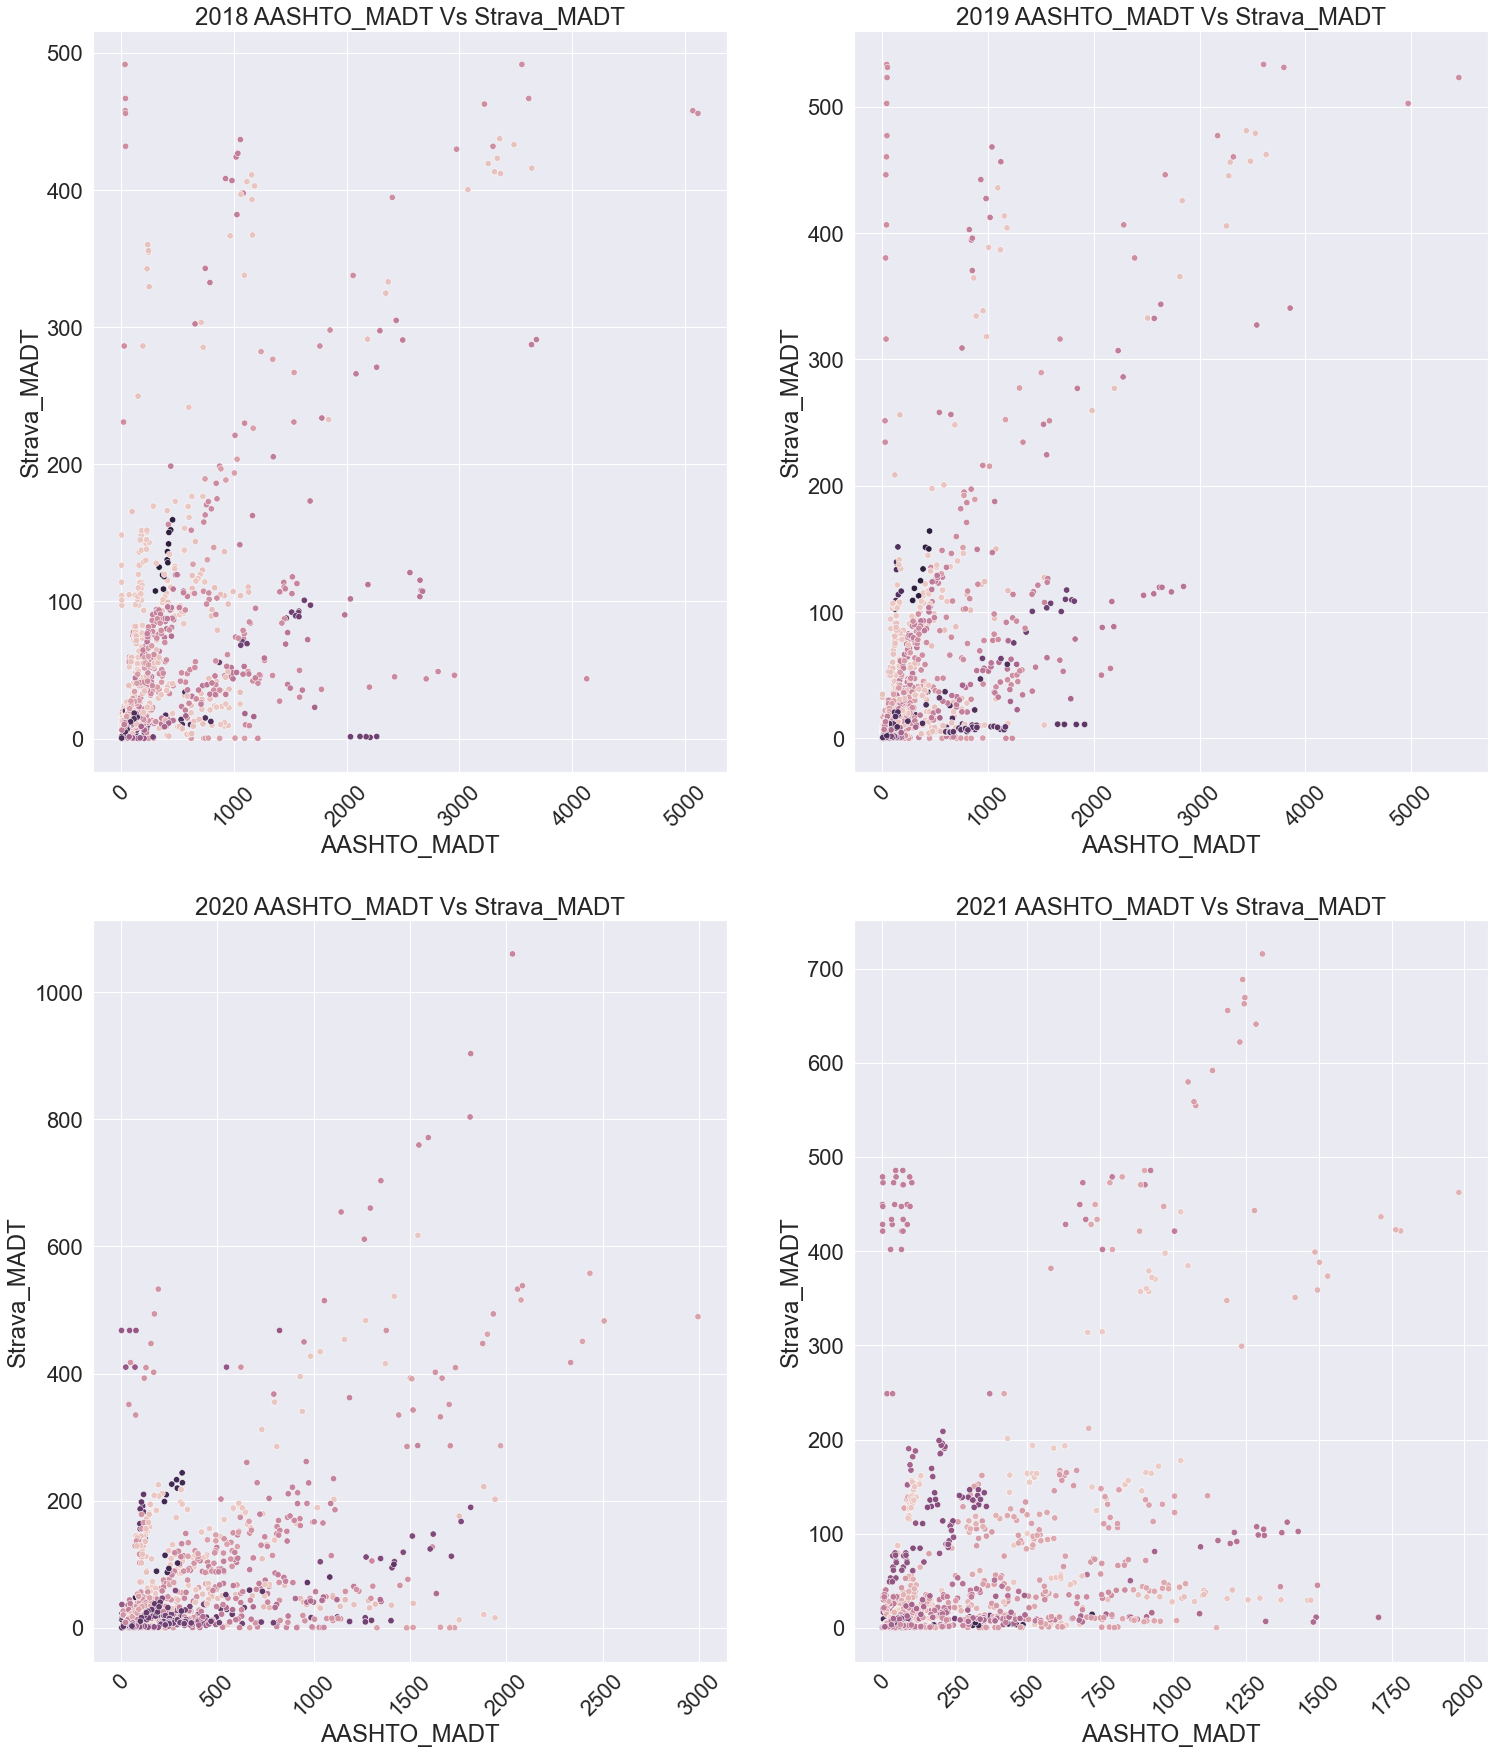

In [43]:
coml=data.loc[data['stv_com_ratio']<0.60]
path_cor(coml)

In [35]:
data.columns

Index(['Unnamed: 0', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'site_name', 'lat', 'long', 'name',
       'OSM Functional Class', 'City Bicycle Facilities', 'geometry',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'Location_County', 'Region',
       'edgeUID_', 'osmId', 'dist', 'edge_uid', 'osm_refere', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio',
       'Strava_MADT'],
      dtype='object')

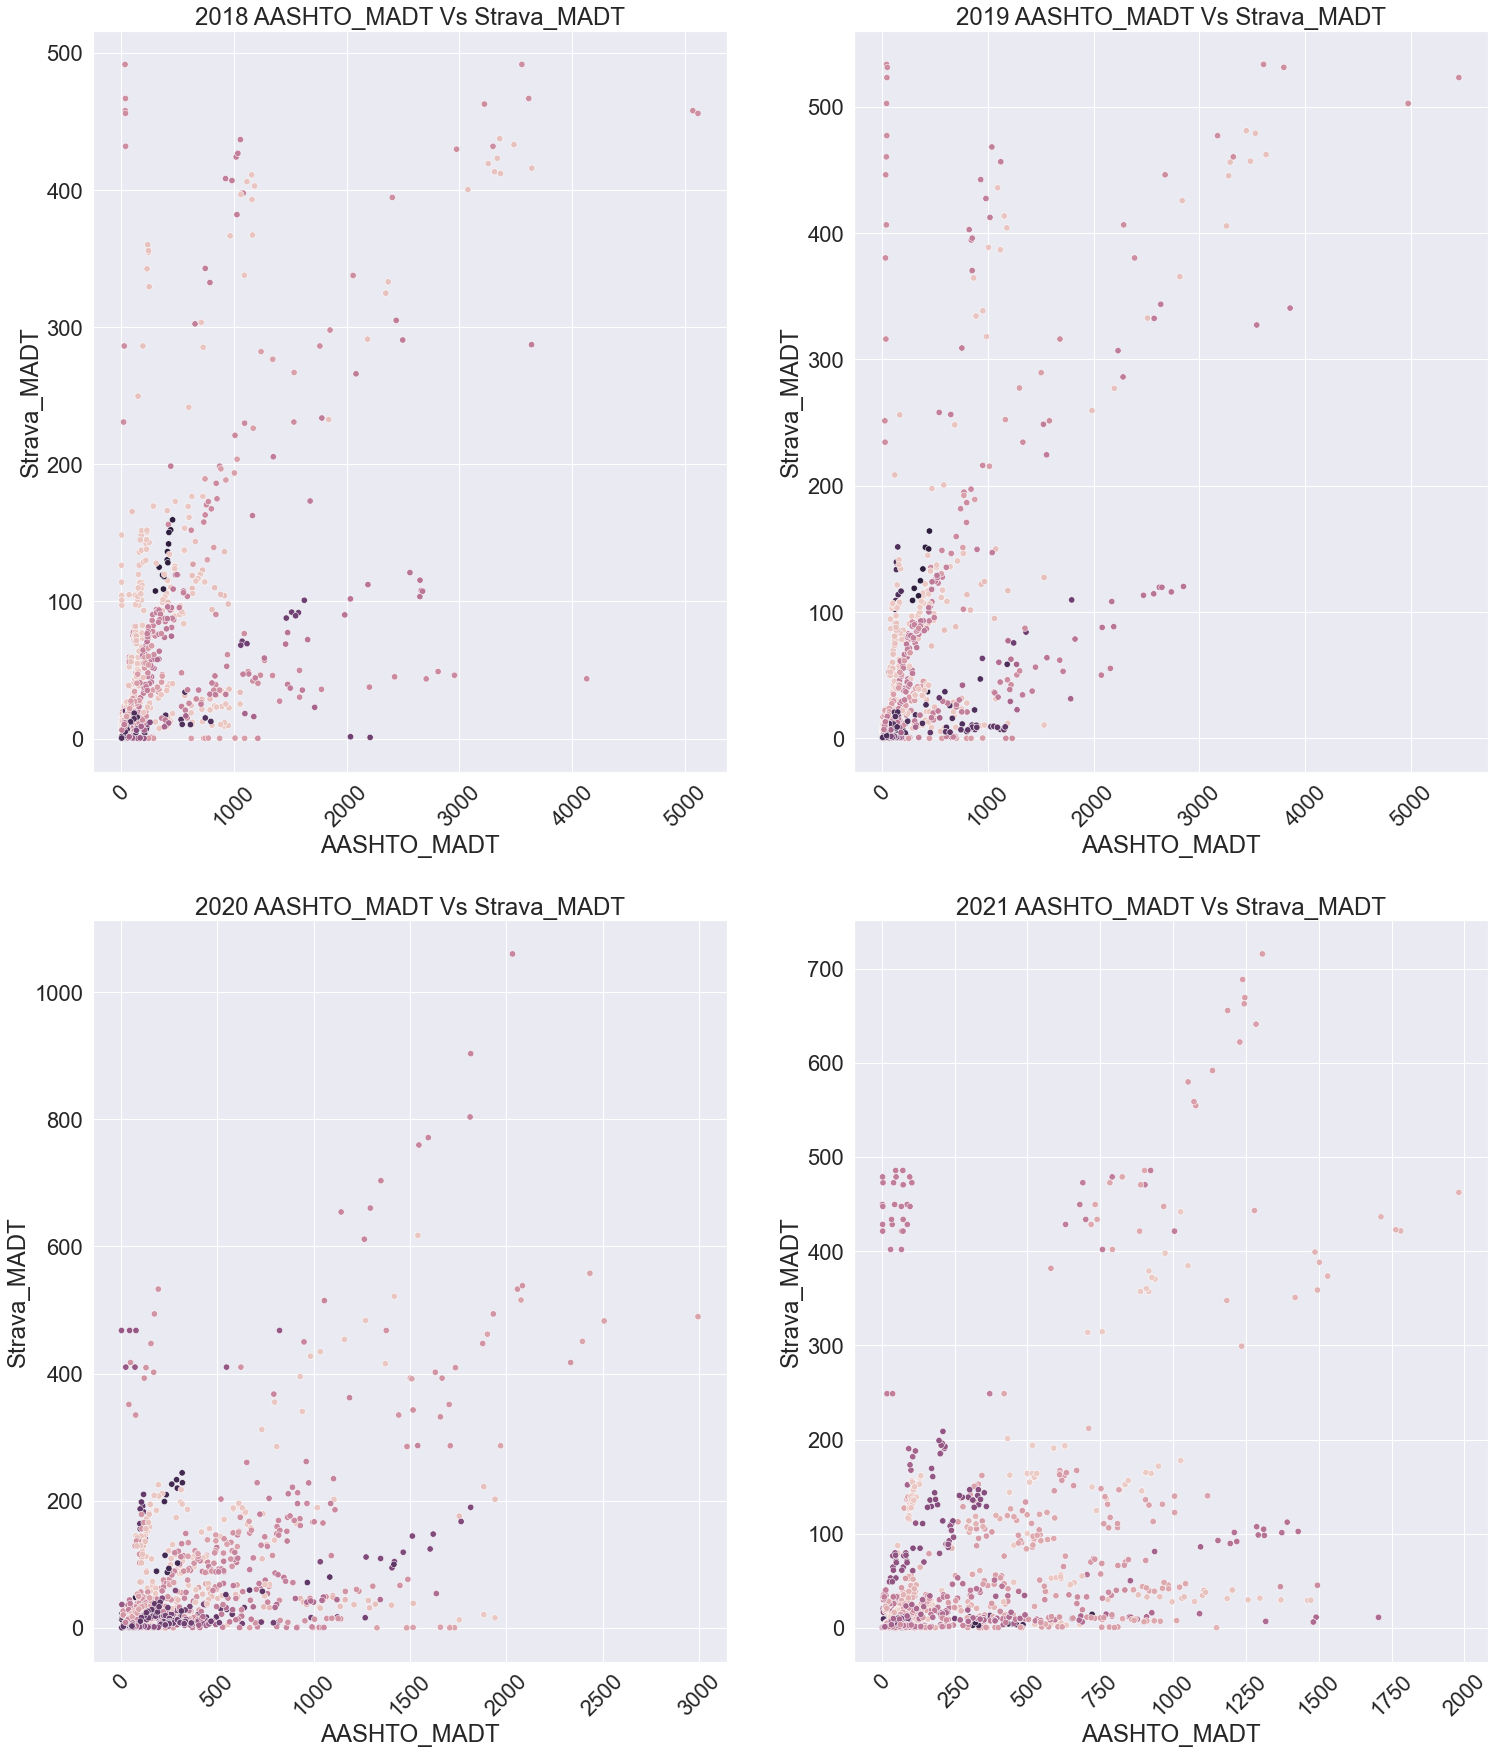

In [44]:
# Dive Commute Vs Recreation
rec=data.loc[data['stv_rec_ratio']>=0.60]
path_cor(rec)

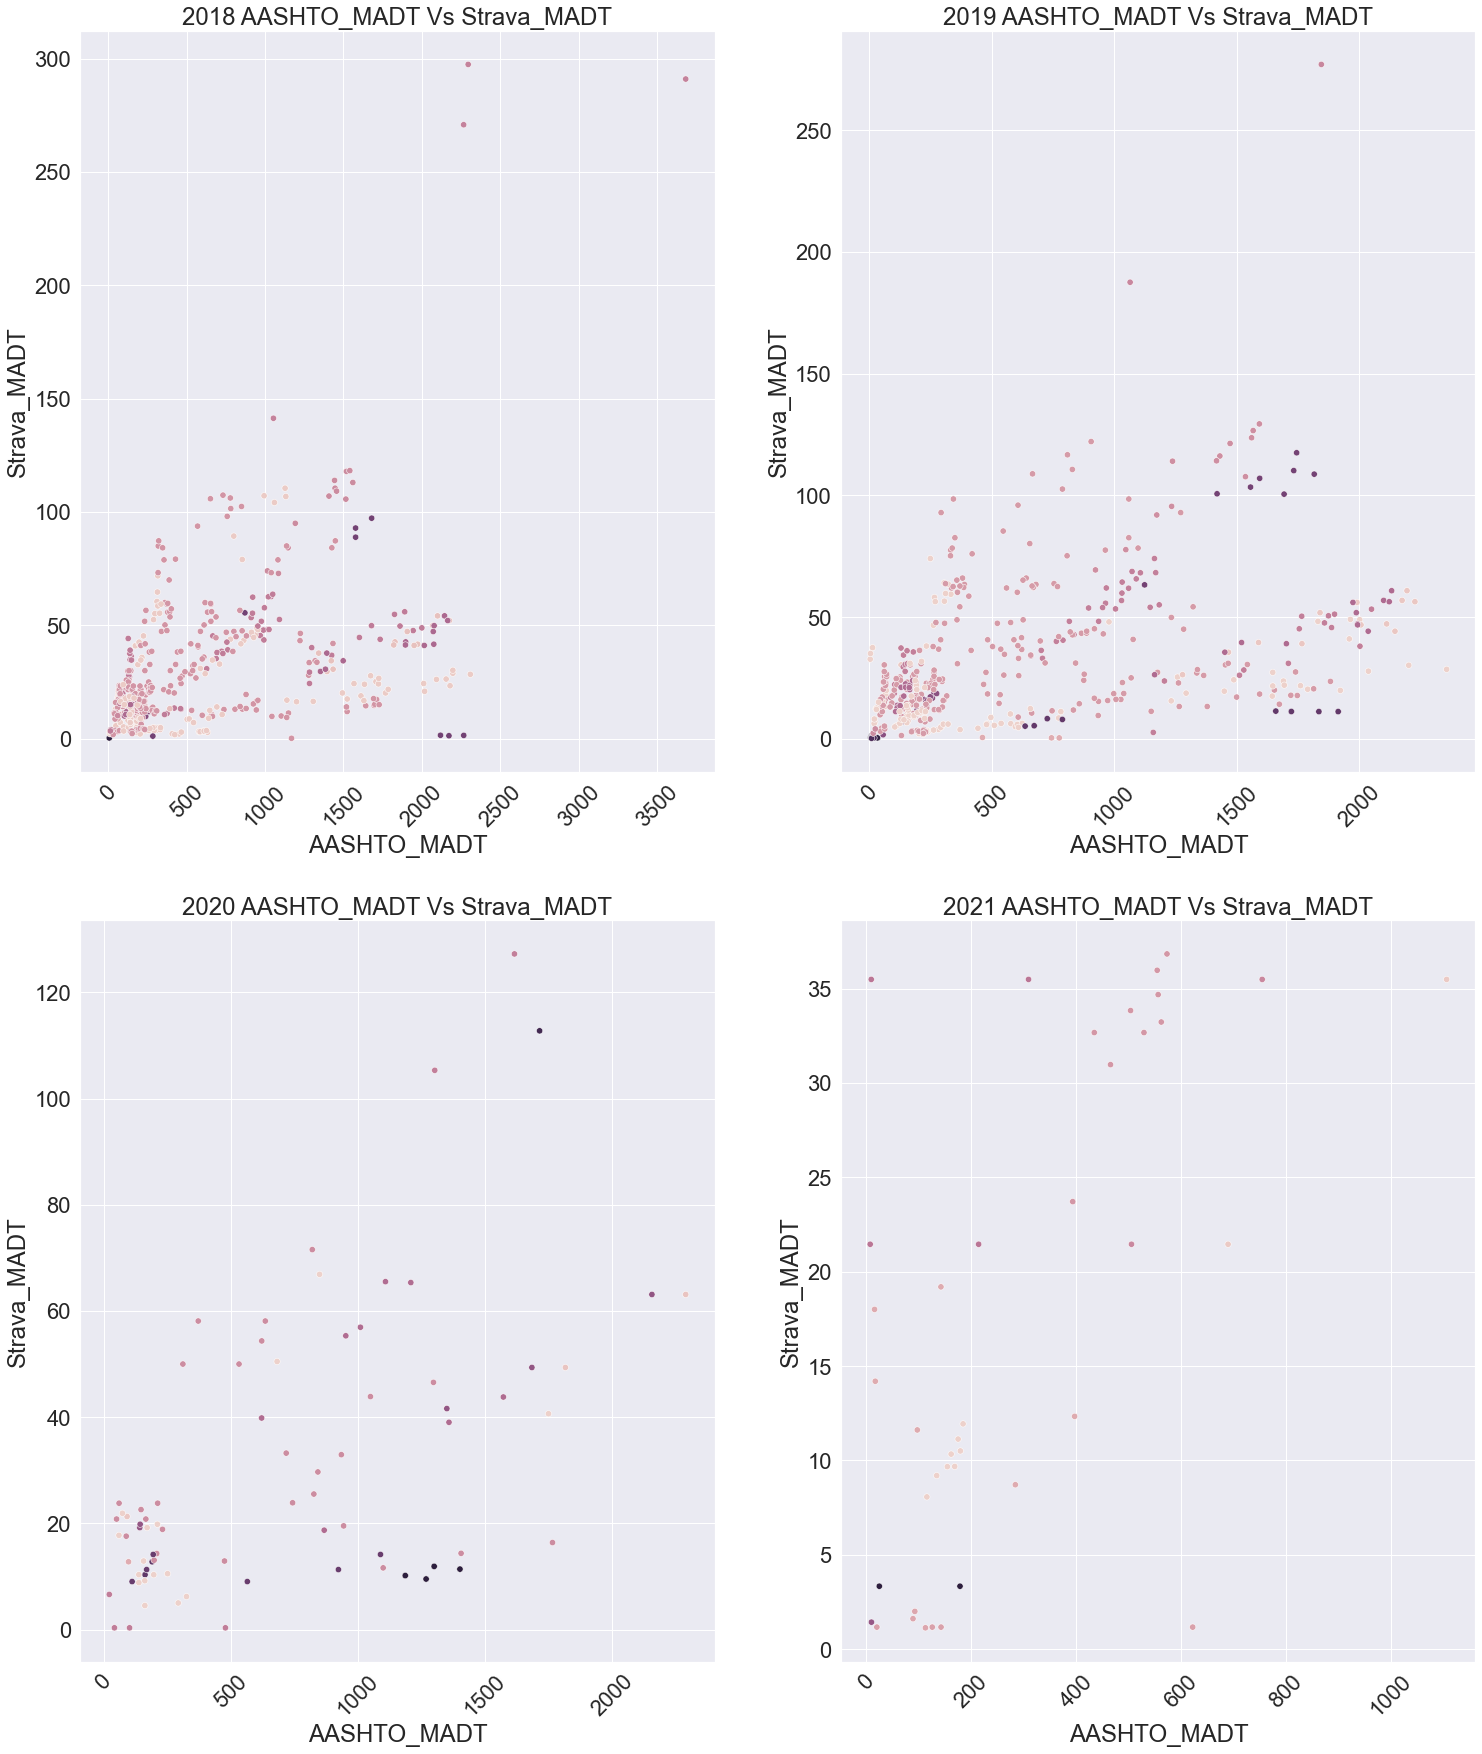

In [45]:
# Dive Commute Vs Recreation
recl=data.loc[data['stv_rec_ratio']<0.60]
path_cor(recl)

# split the pattern by seasonality

In [39]:
data.columns

Index(['Unnamed: 0', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'site_name', 'lat', 'long', 'name',
       'OSM Functional Class', 'City Bicycle Facilities', 'geometry',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'Location_County', 'Region',
       'edgeUID_', 'osmId', 'dist', 'edge_uid', 'osm_refere', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio',
       'Strava_MADT'],
      dtype='object')

In [61]:
# get June/July/August Data
dos678=data[(data['month']>5) &(data['month']<9)]
dos678=dos678[['id','year','AASHTO_MADT']]
dos678c=pd.DataFrame({'Average AASHTO_MADT678' : dos678.groupby(['id','year'])['AASHTO_MADT'].mean()}).reset_index()
dos678c.head()

id  year  Average AASHTO_MADT678
0  100000671  2018                   52.79
1  100000671  2019                   56.96
2  100000671  2020                   90.27
3  100000671  2021                   50.28
4  100002415  2018                 1566.07

In [62]:
# get December/January/February Data
dos12=data.loc[data['month']==12]
dos1=data.loc[data['month']==1]
dos3=data.loc[data['month']==2]
dos1213=pd.concat([dos12,dos1,dos3],axis=0)
dos1213=dos1213[['id','year','AASHTO_MADT']]
dos12131=pd.DataFrame({'Average AASHTO_MADT12131' : dos1213.groupby(['id','year'])['AASHTO_MADT'].mean()}).reset_index()
dos12131.head()

id  year  Average AASHTO_MADT12131
0  100000671  2018                     54.92
1  100000671  2019                     35.86
2  100000671  2020                     55.21
3  100000671  2021                     26.09
4  100002415  2018                   1200.42

In [63]:
seasonal_data=pd.merge(dos12131,dos678c, left_on=['id','year'],right_on=['id','year'],how='inner')
seasonal_data['seasonal_factor']=seasonal_data['Average AASHTO_MADT678']/seasonal_data['Average AASHTO_MADT12131']
seasonal_data=seasonal_data[['id','year','seasonal_factor']]
seasonal_data.head()

id  year  seasonal_factor
0  100000671  2018             0.96
1  100000671  2019             1.59
2  100000671  2020             1.63
3  100000671  2021             1.93
4  100002415  2018             1.30

In [65]:
seasonal_data.shape

(445, 3)

In [66]:
data1=pd.merge(data, seasonal_data, on=['id','year'], how='inner')
data1.shape

(5415, 46)

In [68]:
data1['seasonal_factor'].describe()

count   5415.00
mean       2.34
std        5.80
min        0.02
25%        1.23
50%        1.40
75%        1.63
max       87.78
Name: seasonal_factor, dtype: float64

In [154]:
hs=data1.loc[data1['seasonal_factor']>3]
hs['county'].unique()

array(['El Dorado County', 'Alameda County', nan, 'Placer County',
       'Humboldt County'], dtype=object)

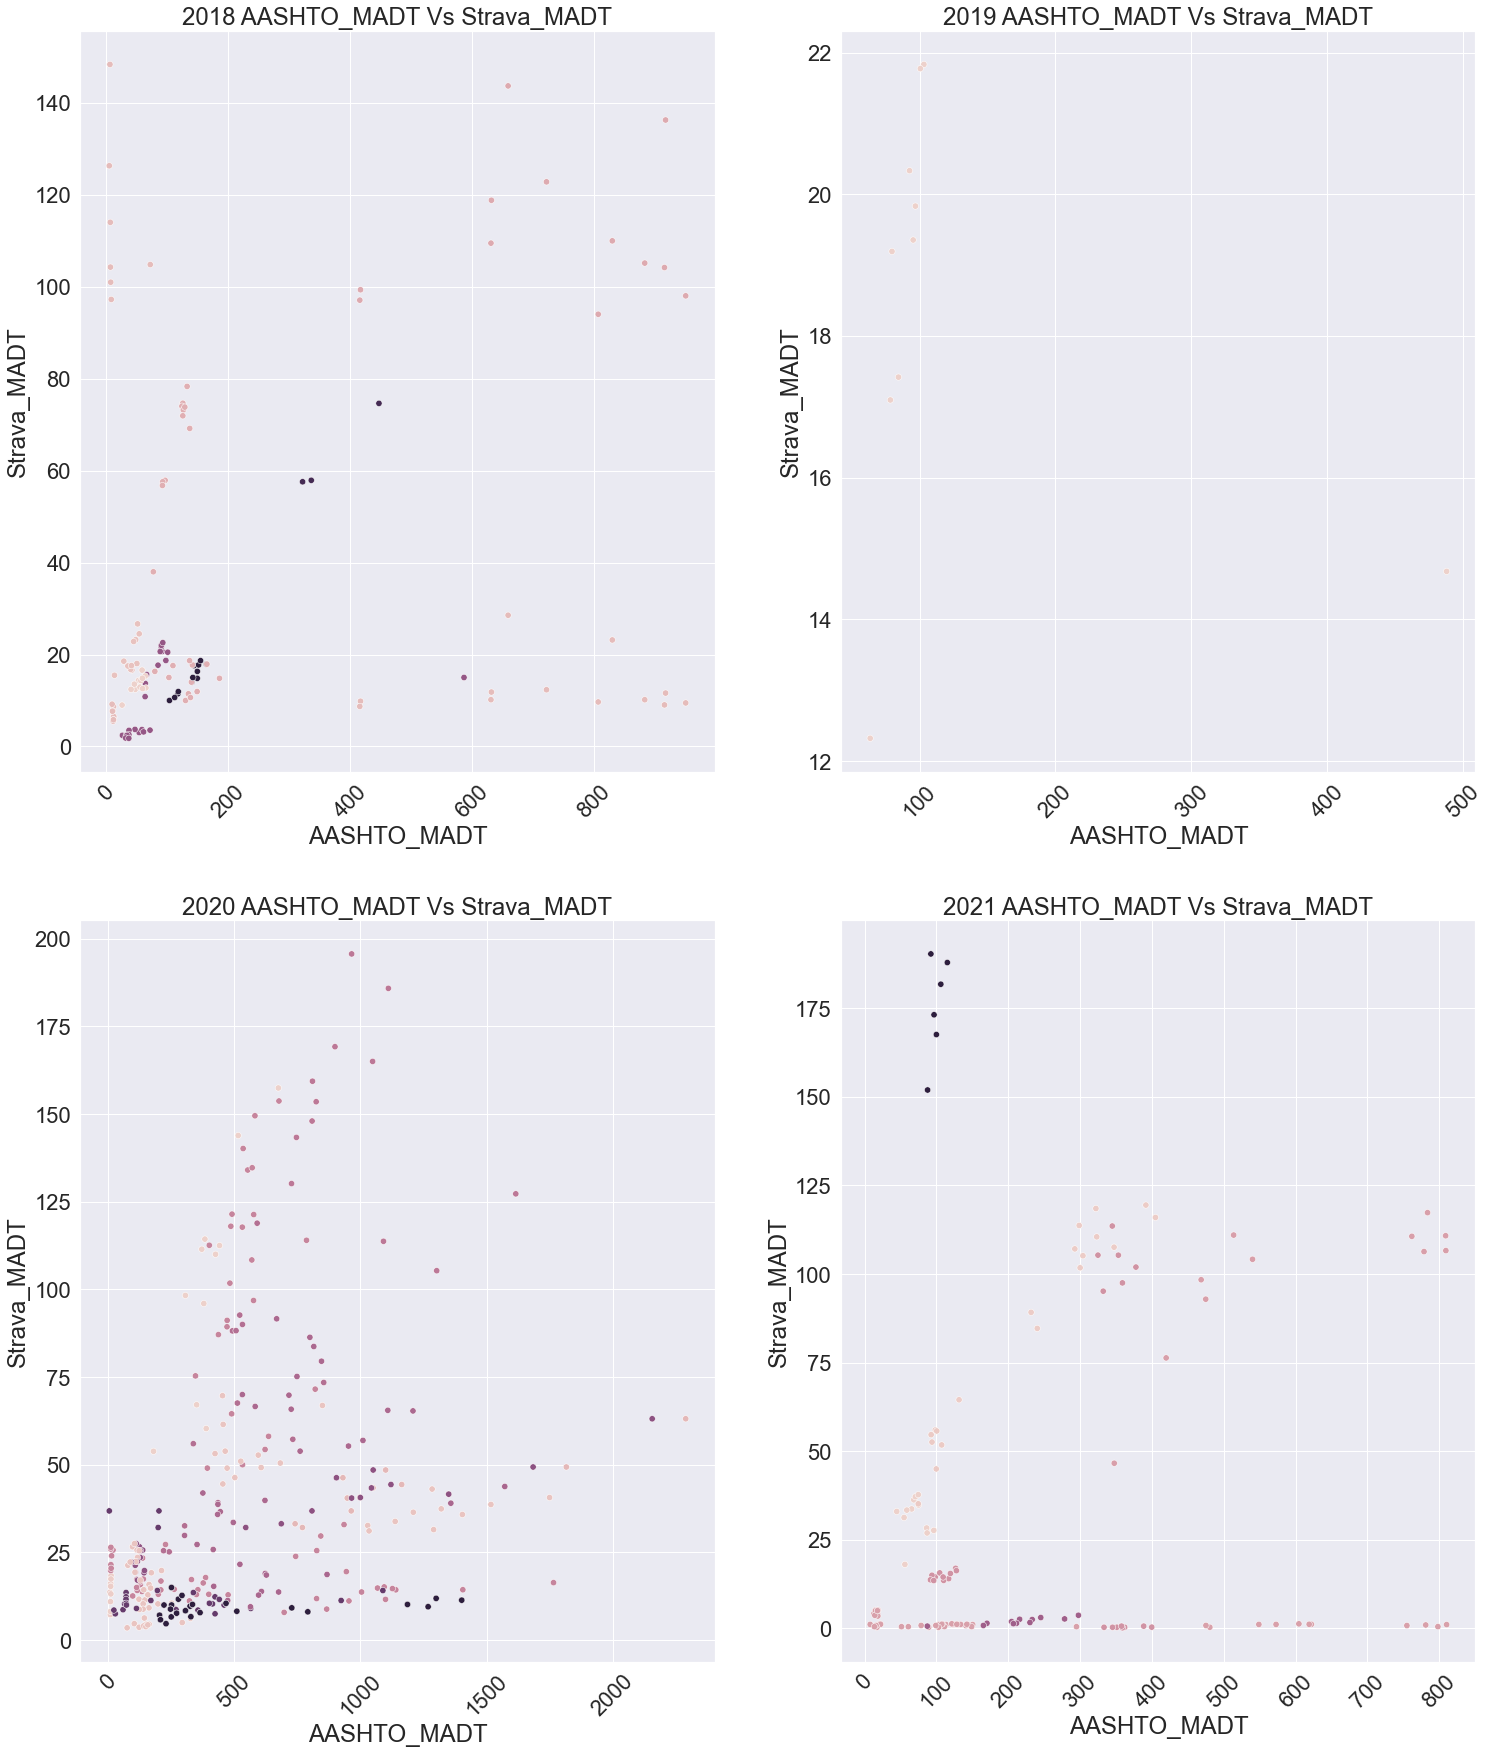

In [87]:
d1m=data1.loc[data1['seasonal_factor']<=1.0]
path_cor(d1m)

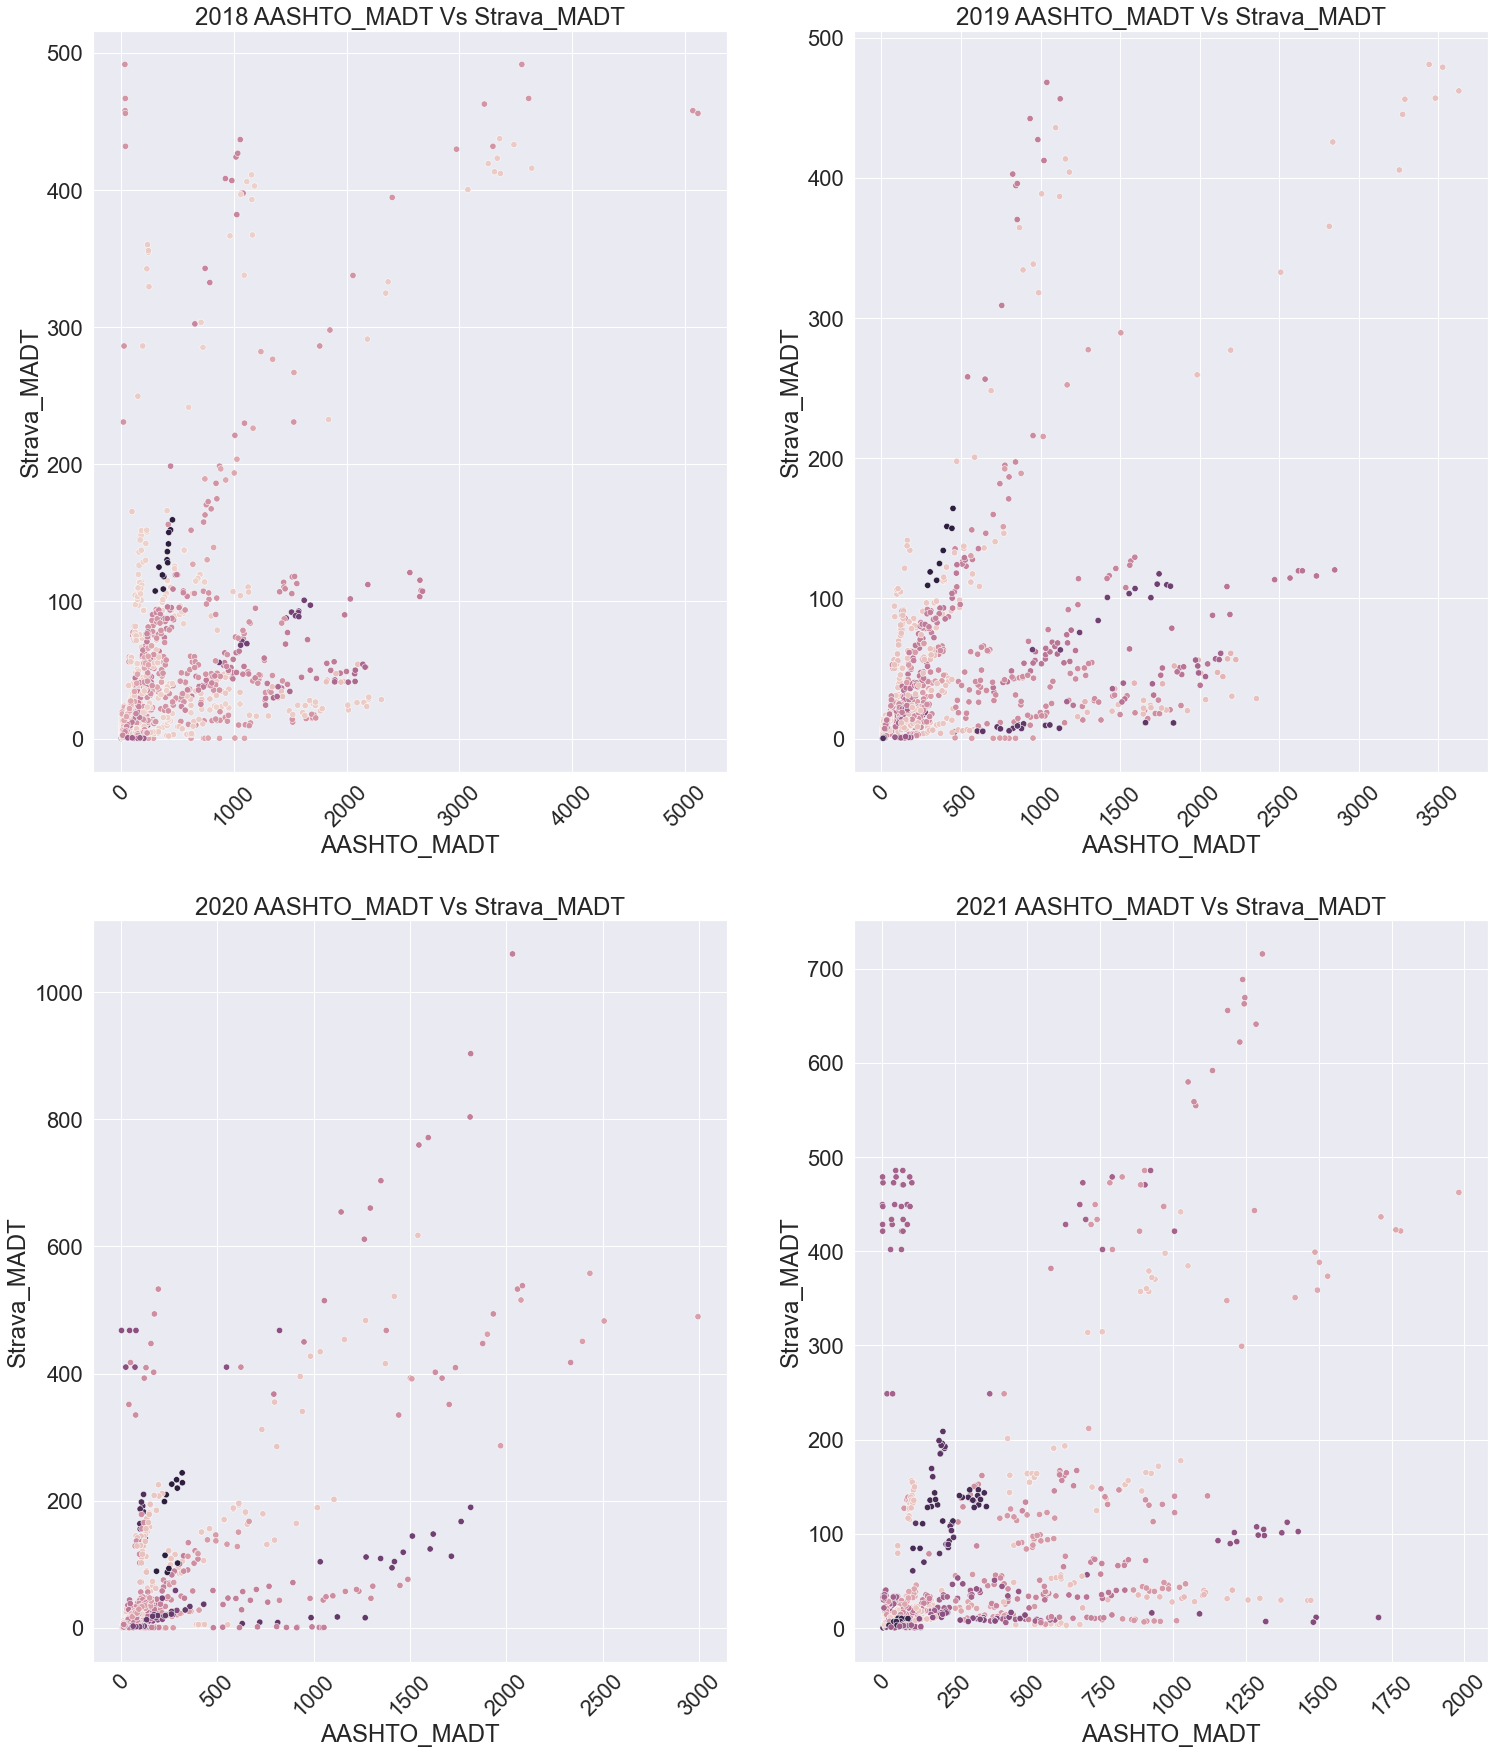

In [85]:
d2m=data1[(data1.seasonal_factor>1)& (data1.seasonal_factor<=2.0) ]
path_cor(d2m)

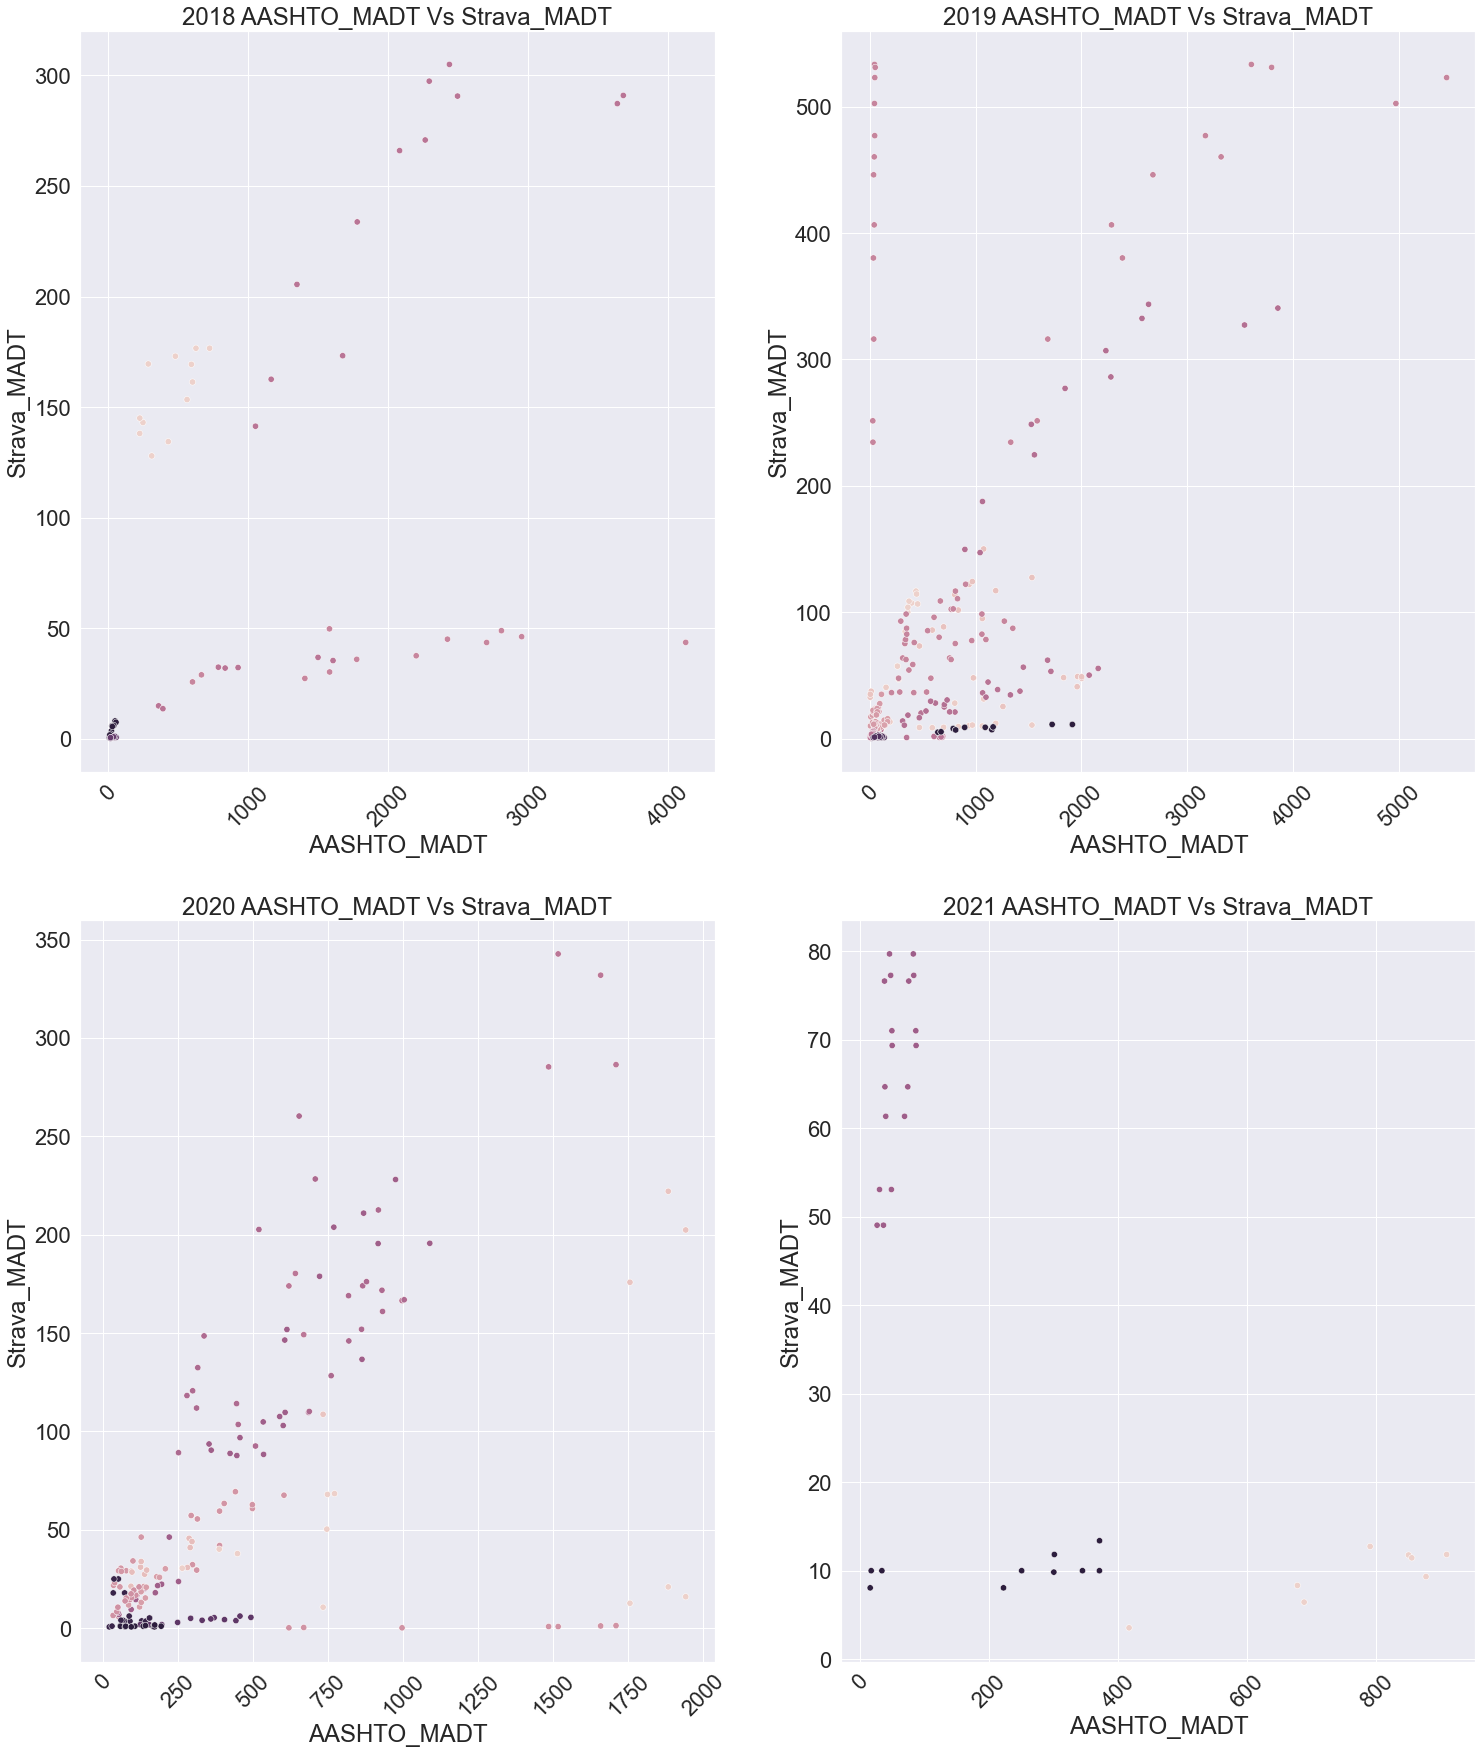

In [84]:
d2m=data1[(data1.seasonal_factor>2.0)& (data1.seasonal_factor<=5) ]
path_cor(d2m)

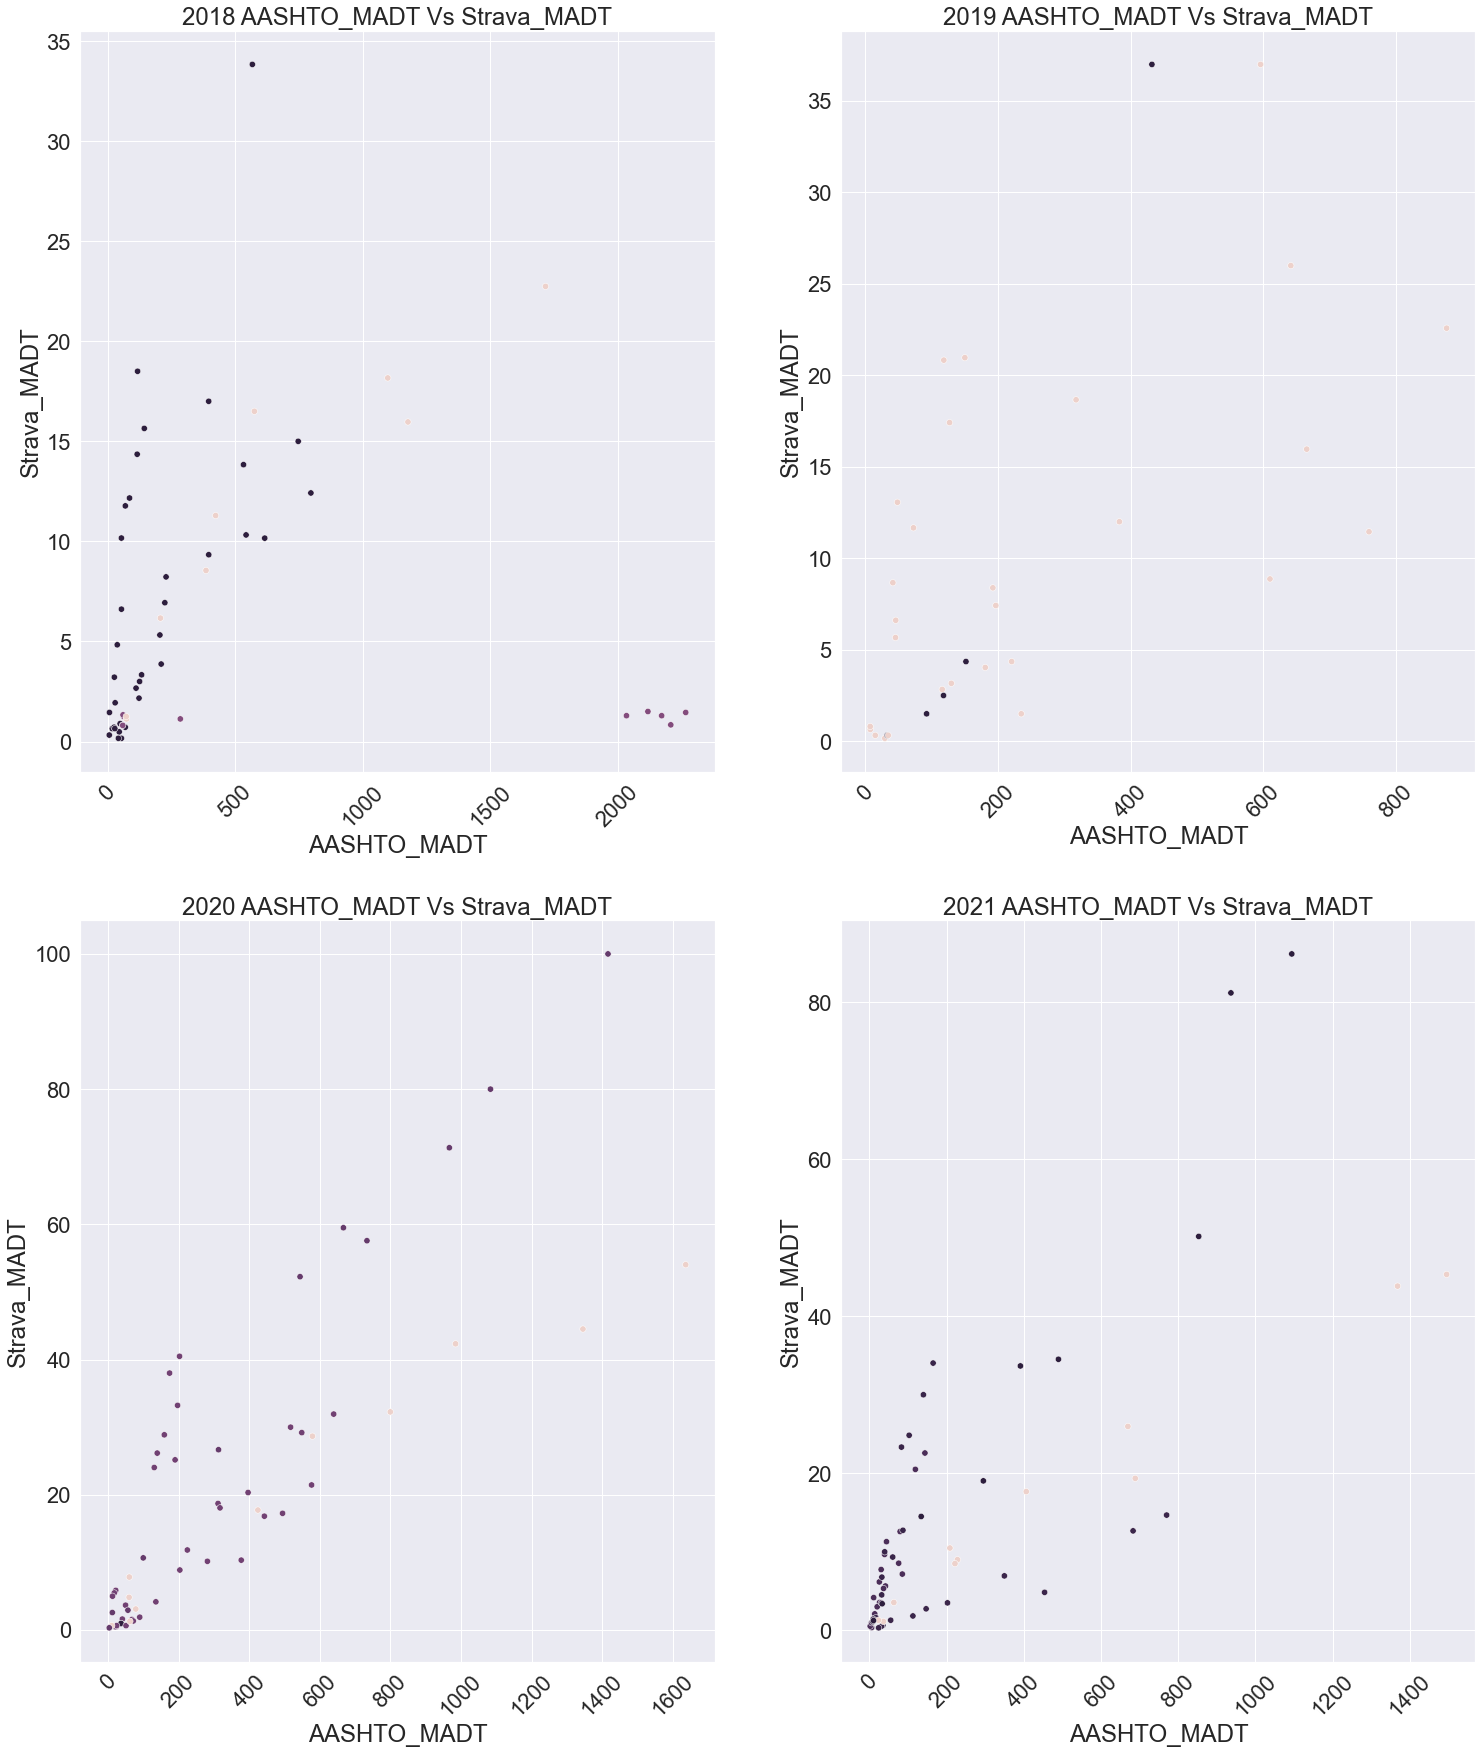

In [77]:
d3m=data1.loc[data1['seasonal_factor']>5.0]
path_cor(d3m)

# Lets do it for Combining all 4 years together

In [90]:
av_seasonal_data=pd.DataFrame({'seasonal_factor' : seasonal_data.groupby(['id'])['seasonal_factor'].mean()}).reset_index()
av_seasonal_data.shape

(158, 2)

In [92]:
data1.columns

Index(['Unnamed: 0', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'site_name', 'lat', 'long', 'name',
       'OSM Functional Class', 'City Bicycle Facilities', 'geometry',
       'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'Location_County', 'Region',
       'edgeUID_', 'osmId', 'dist', 'edge_uid', 'osm_refere', 'stv_total',
       'stv_com_total', 'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio',
       'Strava_MADT', 'seasonal_factor'],
      dtype='object')

In [158]:
data2=data1[['id','Simple_MADT', 'AASHTO_MADT','Strava_MADT']]
data2.head()

id  Simple_MADT  AASHTO_MADT  Strava_MADT
0  100003575       160.77       237.33        68.23
1  100003575       282.43       302.61        74.83
2  100003575       188.81       278.71        81.61
3  100003575       202.27       288.95        77.83
4  100003575       257.77       285.39        82.26

In [159]:
av_stv=pd.DataFrame({'stv_total' : data.groupby(['id','month'])['Strava_MADT'].mean()}).reset_index()
av_AASHTO_MADT=pd.DataFrame({'AASHTO_MADT' : data.groupby(['id','month'])['AASHTO_MADT'].mean()}).reset_index()
av_Simple_MADT=pd.DataFrame({'Simple_MADT' : data.groupby(['id','month'])['Simple_MADT'].mean()}).reset_index()
av_data=pd.merge(av_stv,av_AASHTO_MADT,on=['id','month'], how='inner')
av_data1=pd.merge(av_data,av_Simple_MADT,on=['id','month'], how='inner')
av_data1.head()

id  month  stv_total  AASHTO_MADT  Simple_MADT
0  100000671      1      10.16        42.32        28.15
1  100000671      2      14.40        47.37        37.65
2  100000671      3      15.48        51.68        44.00
3  100000671      4      20.46        70.64        55.93
4  100000671      5      21.61        78.20        63.49

In [160]:
av_data1.shape

(1963, 5)

In [161]:
av_data2=pd.merge(av_data1,av_seasonal_data,on=['id'], how='inner')
av_data2.head()

id  month  stv_total  AASHTO_MADT  Simple_MADT  seasonal_factor
0  100000671      1      10.16        42.32        28.15             1.53
1  100000671      2      14.40        47.37        37.65             1.53
2  100000671      3      15.48        51.68        44.00             1.53
3  100000671      4      20.46        70.64        55.93             1.53
4  100000671      5      21.61        78.20        63.49             1.53

In [162]:
def MADT_plot_ave (MOY_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)
    ax=sns.scatterplot(x=MOY_ind['AASHTO_MADT'],y=MOY_ind['stv_total'], hue=MOY_ind['id'],markers=True,marker="o",s=80)
    ax.get_legend().remove()
    plt.xticks(rotation = 'vertical')
    ax.title.set_text('2019-2021 Average AASHTO_MADT')
    ax.set_ylabel('Average Strava MADT')
    ax.set_xlabel('Average AASHTO_MADT')
    plt.show()

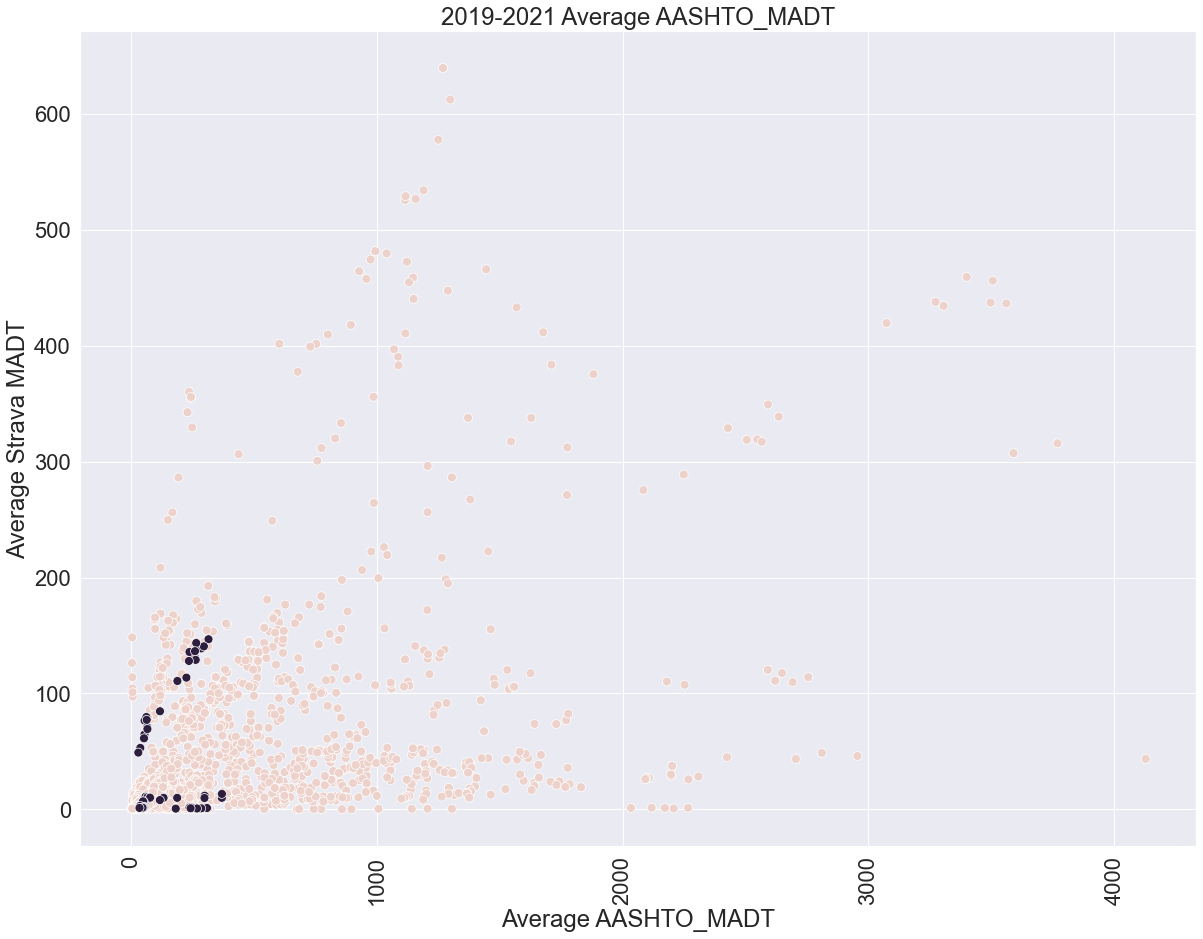

In [163]:
MADT_plot_ave(av_data2)

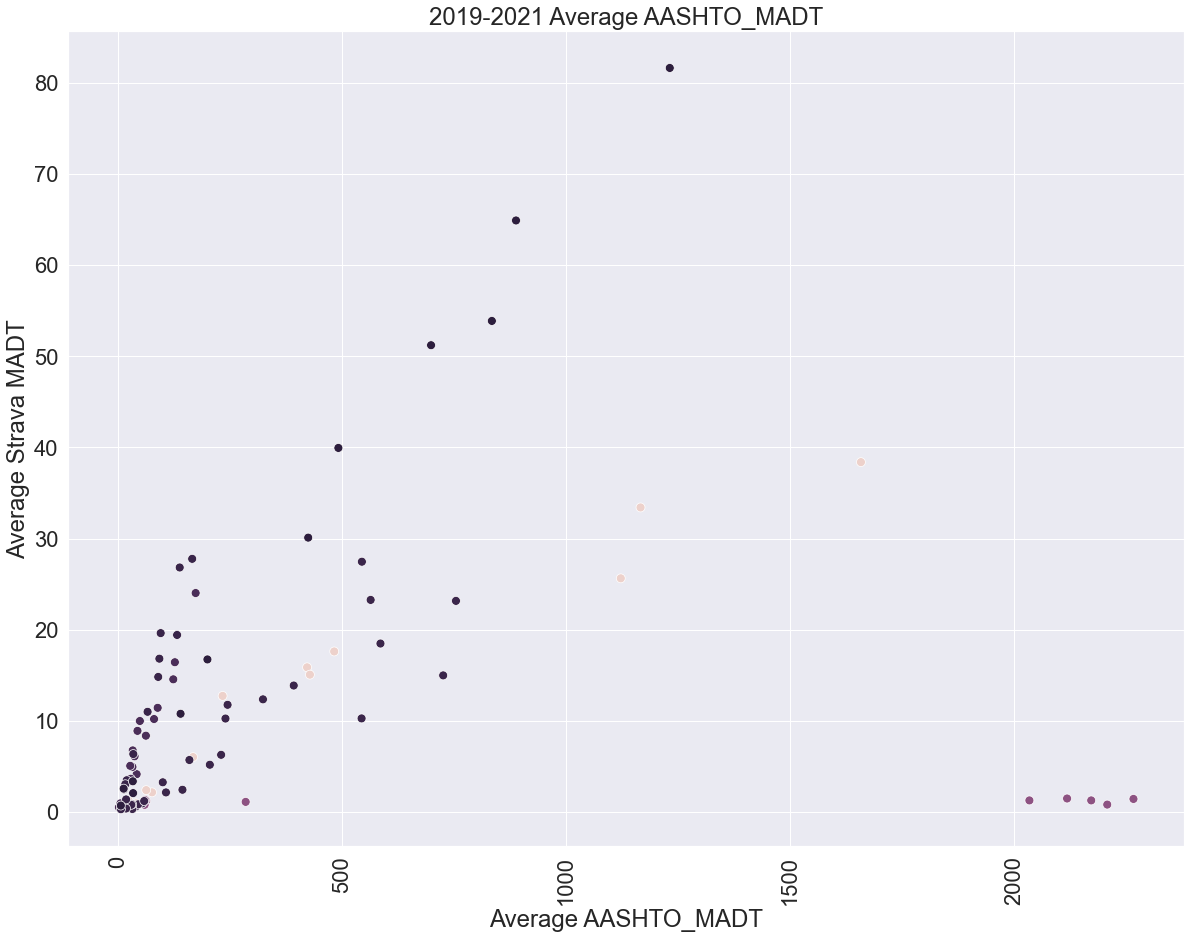

In [164]:
d3am=av_data2.loc[av_data2['seasonal_factor']>3.0]
MADT_plot_ave(d3am)

In [167]:
av_data2['id'].nunique()

158

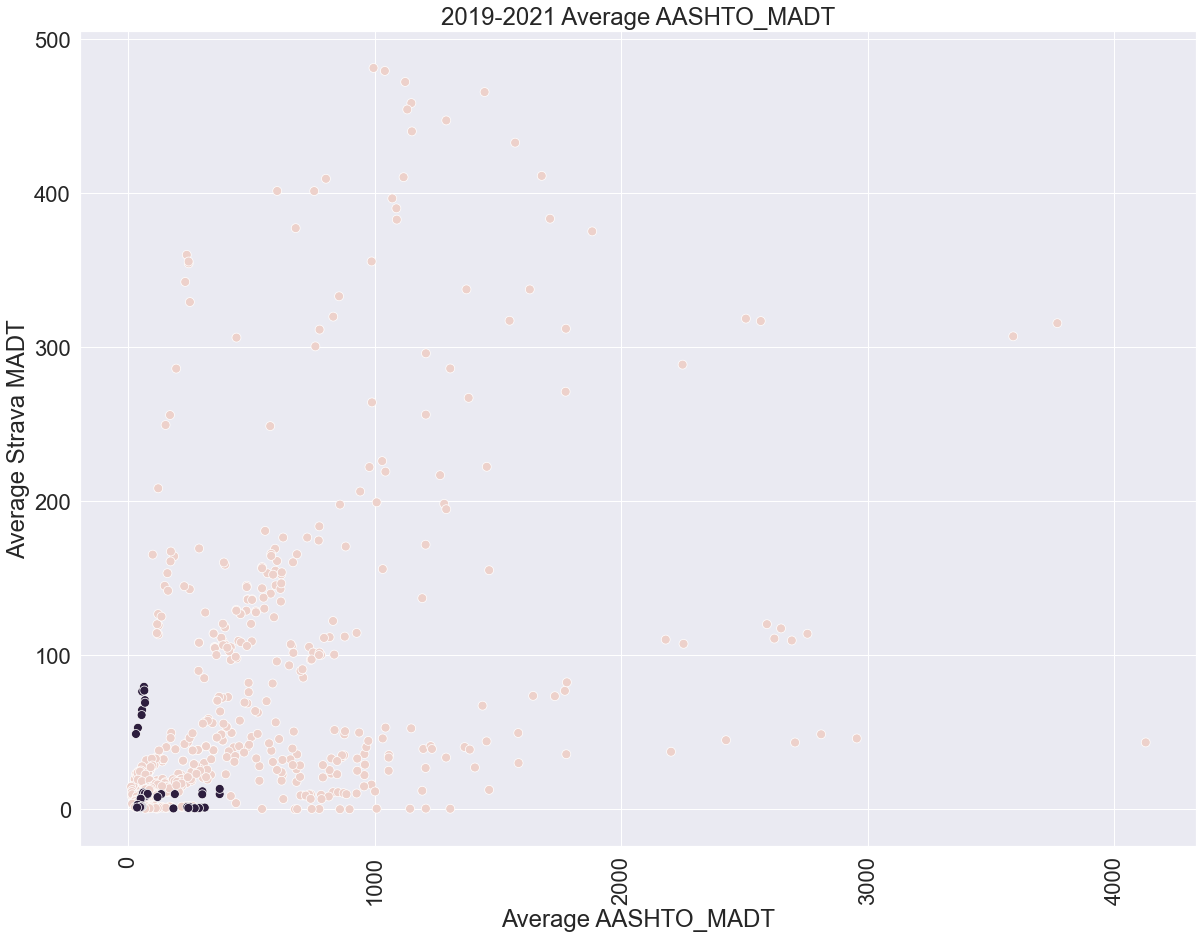

In [165]:
d2am=av_data2[(av_data2.seasonal_factor>1.5)& (av_data2.seasonal_factor<=3) ]
MADT_plot_ave(d2am)

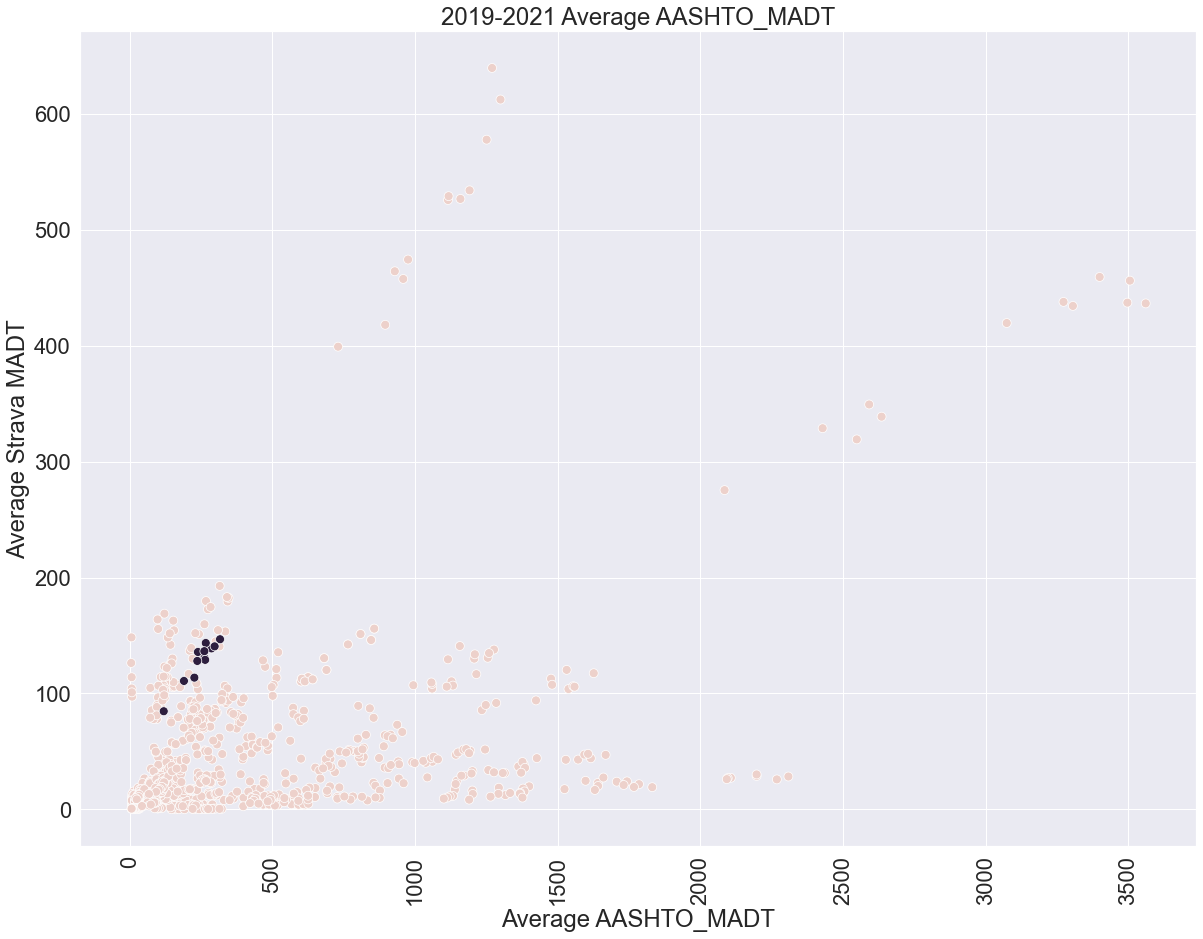

In [168]:
d1am=av_data2.loc[av_data2['seasonal_factor']<=1.5]
MADT_plot_ave(d1am)